# Our goal is to predict the Target in the Bank Churn Dataset using Machine Learning algorithms

This project is being developed by:

  - Devendra Singh Shekhawat
  - Gaurav Singh
  - Swetha Tanikonda
  - Venkat Sai Rangisetti
  - Sushma Rangisetti  
  - Bikky Singh
  - Jankiba Viralsinh Zala

  - We are going to import pandas to use the DataFrame
  - We are importing numpy for future mathematics we must use
  - Also matplolib and seaborn for data visualization
  - Logistic Regression and SVM for Model building

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from SALib.analyze import sobol
from SALib.sample import saltelli
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import random

Opening our DataFrame

In [2]:
df = pd.read_csv("../database (1)/bank_data_train.csv")

DATA DESCRIPTION BEGINS

In [3]:
df

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355185,590822,0,0.000000,0.0,NaN,0.0,0.0,0.0,0.142857,0.123579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
355186,590823,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355187,590825,0,0.041298,NaN,NaN,NaN,NaN,0.0,0.089286,0.065293,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
355188,590826,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [4]:
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [5]:
df.shape

(355190, 116)

In [6]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()}")

ID: 0
CR_PROD_CNT_IL: 0
AMOUNT_RUB_CLO_PRC: 38323
PRC_ACCEPTS_A_EMAIL_LINK: 200027
APP_REGISTR_RGN_CODE: 294640
PRC_ACCEPTS_A_POS: 200027
PRC_ACCEPTS_A_TK: 200027
TURNOVER_DYNAMIC_IL_1M: 0
CNT_TRAN_AUT_TENDENCY1M: 278078
SUM_TRAN_AUT_TENDENCY1M: 278078
AMOUNT_RUB_SUP_PRC: 38323
PRC_ACCEPTS_A_AMOBILE: 200027
SUM_TRAN_AUT_TENDENCY3M: 244138
CLNT_TRUST_RELATION: 285769
PRC_ACCEPTS_TK: 200027
PRC_ACCEPTS_A_MTP: 200027
REST_DYNAMIC_FDEP_1M: 0
CNT_TRAN_AUT_TENDENCY3M: 244138
CNT_ACCEPTS_TK: 200027
APP_MARITAL_STATUS: 286956
REST_DYNAMIC_SAVE_3M: 0
CR_PROD_CNT_VCU: 0
REST_AVG_CUR: 0
CNT_TRAN_MED_TENDENCY1M: 286223
APP_KIND_OF_PROP_HABITATION: 295829
CLNT_JOB_POSITION_TYPE: 310409
AMOUNT_RUB_NAS_PRC: 38323
CLNT_JOB_POSITION: 144379
APP_DRIVING_LICENSE: 297933
TRANS_COUNT_SUP_PRC: 38323
APP_EDUCATION: 287086
CNT_TRAN_CLO_TENDENCY1M: 288894
SUM_TRAN_MED_TENDENCY1M: 286223
PRC_ACCEPTS_A_ATM: 200027
PRC_ACCEPTS_MTP: 200027
TRANS_COUNT_NAS_PRC: 38323
APP_TRAVEL_PASS: 297933
CNT_ACCEPTS_MTP: 200027


In [7]:
# Let us drop the data with more than 60 % of the null values to make our dataset more compatible the model.
threshold = len(df) * 0.6
df = df.dropna(thresh=threshold, axis=1)
print(df)

            ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  TURNOVER_DYNAMIC_IL_1M  \
0       146841               0            0.000000                     0.0   
1       146842               0            0.041033                     0.0   
2       146843               0            0.006915                     0.0   
3       146844               0            0.000000                     0.0   
4       146845               0            0.000000                     0.0   
...        ...             ...                 ...                     ...   
355185  590822               0            0.000000                     0.0   
355186  590823               0            0.000000                     0.0   
355187  590825               0            0.041298                     0.0   
355188  590826               0            0.000000                     0.0   
355189  590828               0            0.000000                     0.0   

        AMOUNT_RUB_SUP_PRC  REST_DYNAMIC_FDEP_1M  REST_DYNAMIC_

In [8]:
df.isnull().sum(axis=0)

ID                              0
CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC          38323
TURNOVER_DYNAMIC_IL_1M          0
AMOUNT_RUB_SUP_PRC          38323
REST_DYNAMIC_FDEP_1M            0
REST_DYNAMIC_SAVE_3M            0
CR_PROD_CNT_VCU                 0
REST_AVG_CUR                    0
AMOUNT_RUB_NAS_PRC          38323
TRANS_COUNT_SUP_PRC         38323
TRANS_COUNT_NAS_PRC         38323
CR_PROD_CNT_TOVR                0
CR_PROD_CNT_PIL                 0
TURNOVER_CC                     0
TRANS_COUNT_ATM_PRC         38323
AMOUNT_RUB_ATM_PRC          38323
TURNOVER_PAYM                   0
AGE                             0
CR_PROD_CNT_CC                  0
REST_DYNAMIC_FDEP_3M            0
REST_DYNAMIC_IL_1M              0
CR_PROD_CNT_CCFP                0
REST_DYNAMIC_CUR_1M             0
REST_AVG_PAYM                   0
LDEAL_GRACE_DAYS_PCT_MED        0
REST_DYNAMIC_CUR_3M             0
TURNOVER_DYNAMIC_CUR_1M         0
REST_DYNAMIC_PAYM_3M            0
REST_DYNAMIC_I

In [9]:
df.shape

(355190, 46)

In [10]:
# Dropping Id Column because it is of no use
df.drop('ID', axis=1, inplace=True)

# Let's do Data Cleaning

Box plots and histograms to determine what method to use for filling null values.

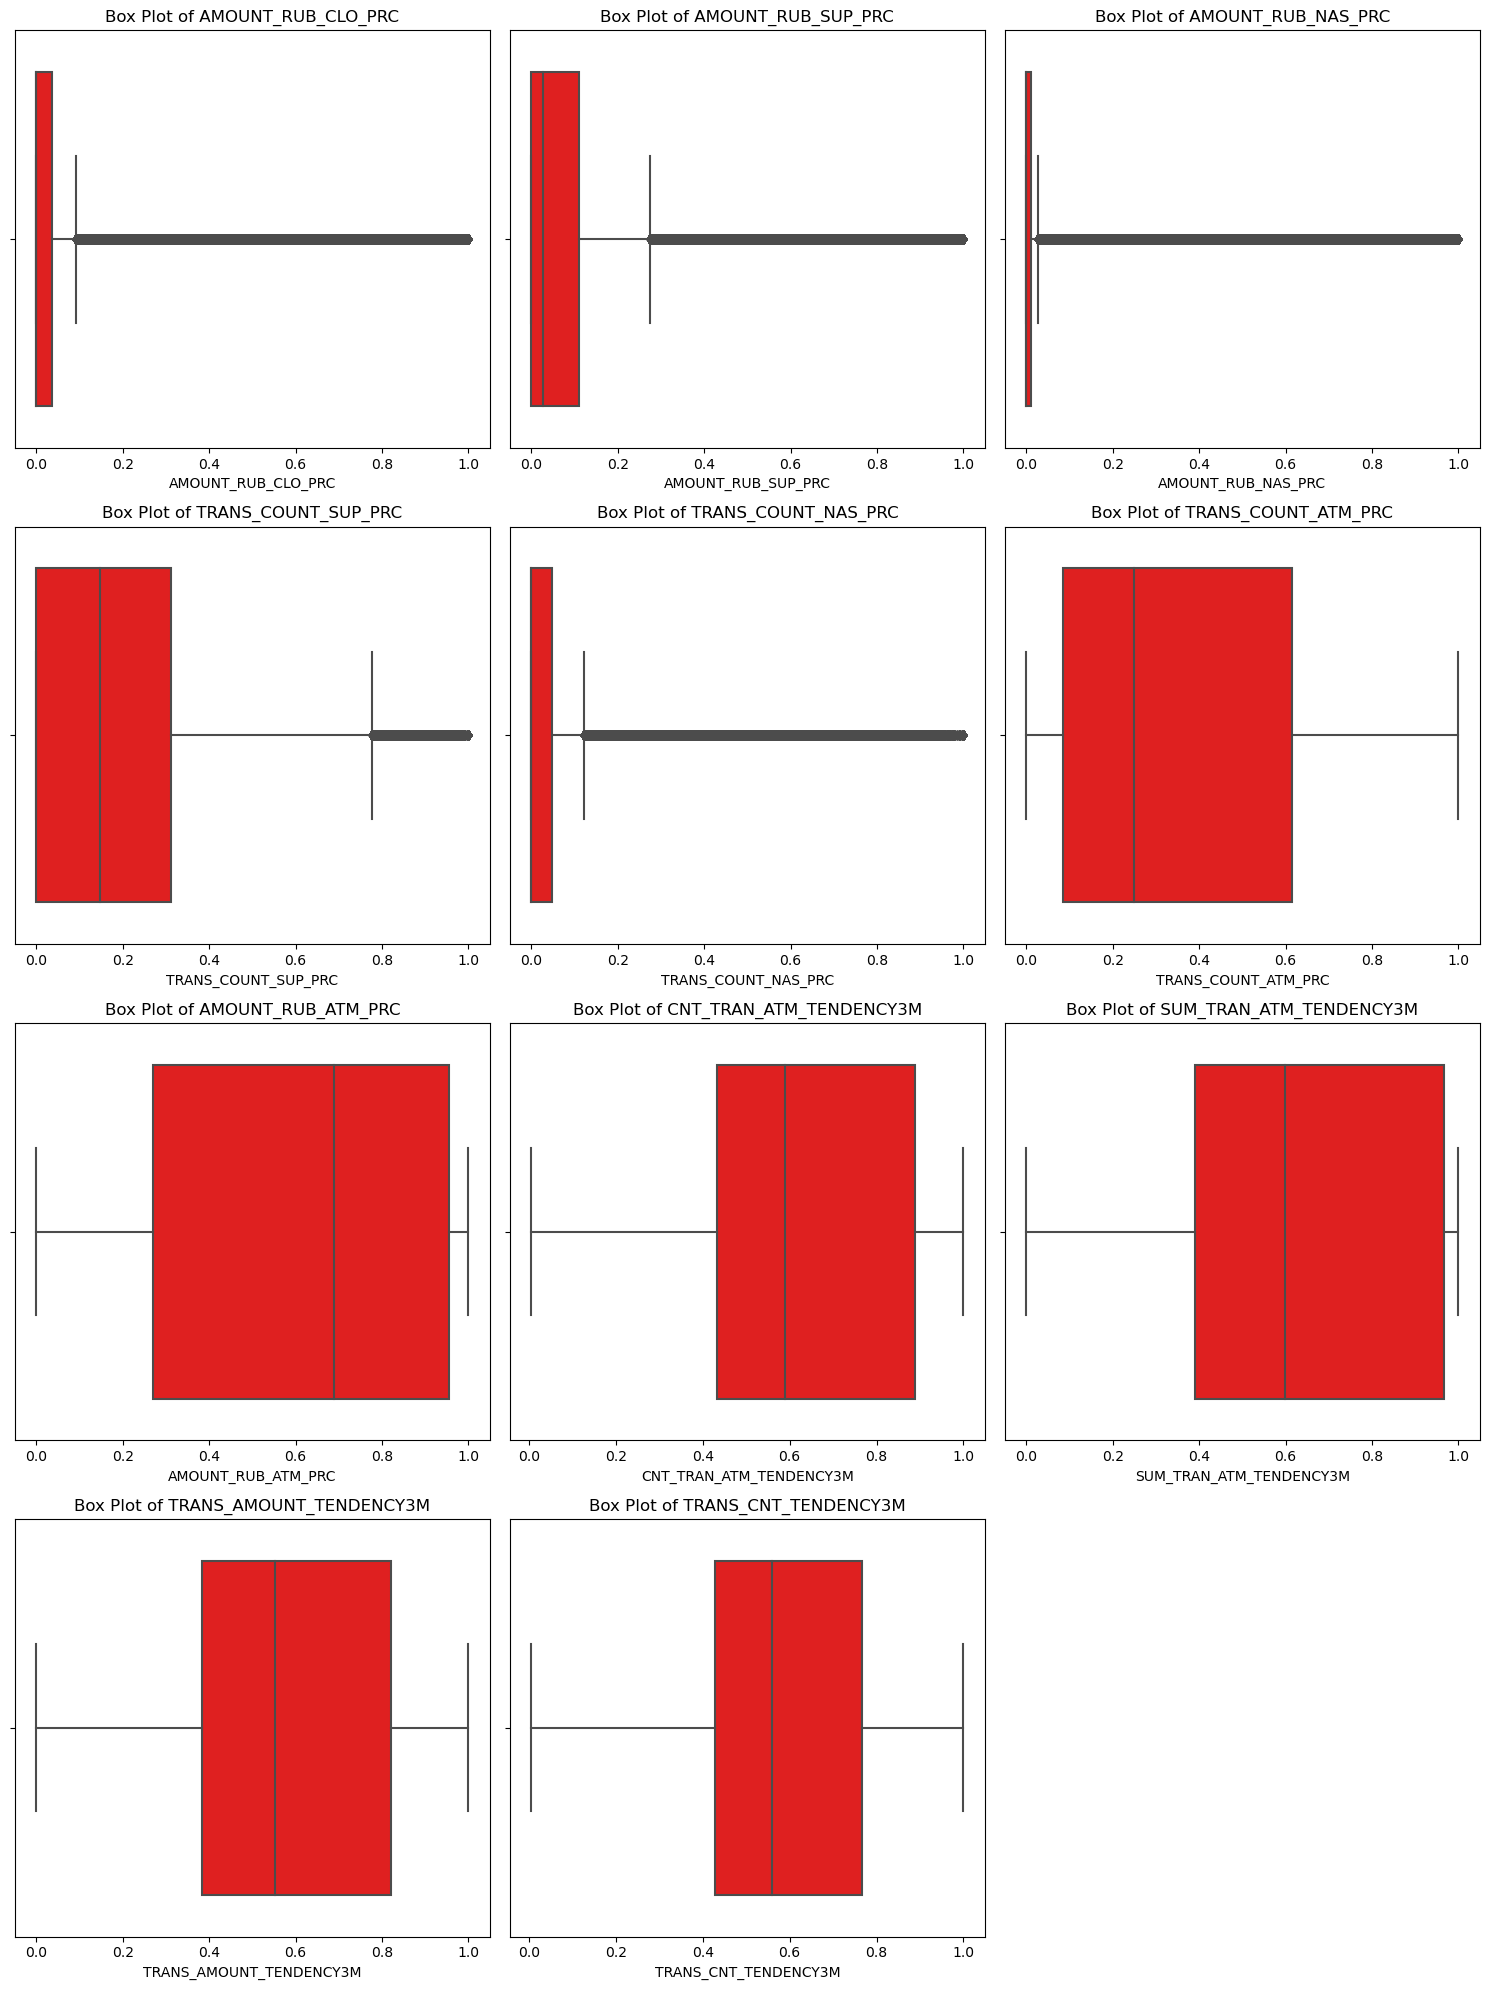

In [11]:
# Filter columns with null values
columns_with_nulls = df.columns[df.isnull().any()]

# Set up subplots for box plots
num_rows = (len(columns_with_nulls) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

# Plot box plots for columns with null values
for i, column in enumerate(columns_with_nulls):
    sns.boxplot(x=df[column], color='red', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Box Plot of {column}')
    axes[i // 3, i % 3].set_xlabel(column)

# Hide empty subplots
if len(columns_with_nulls) < num_rows * 3:
    for j in range(len(columns_with_nulls), num_rows * 3):
        axes[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()

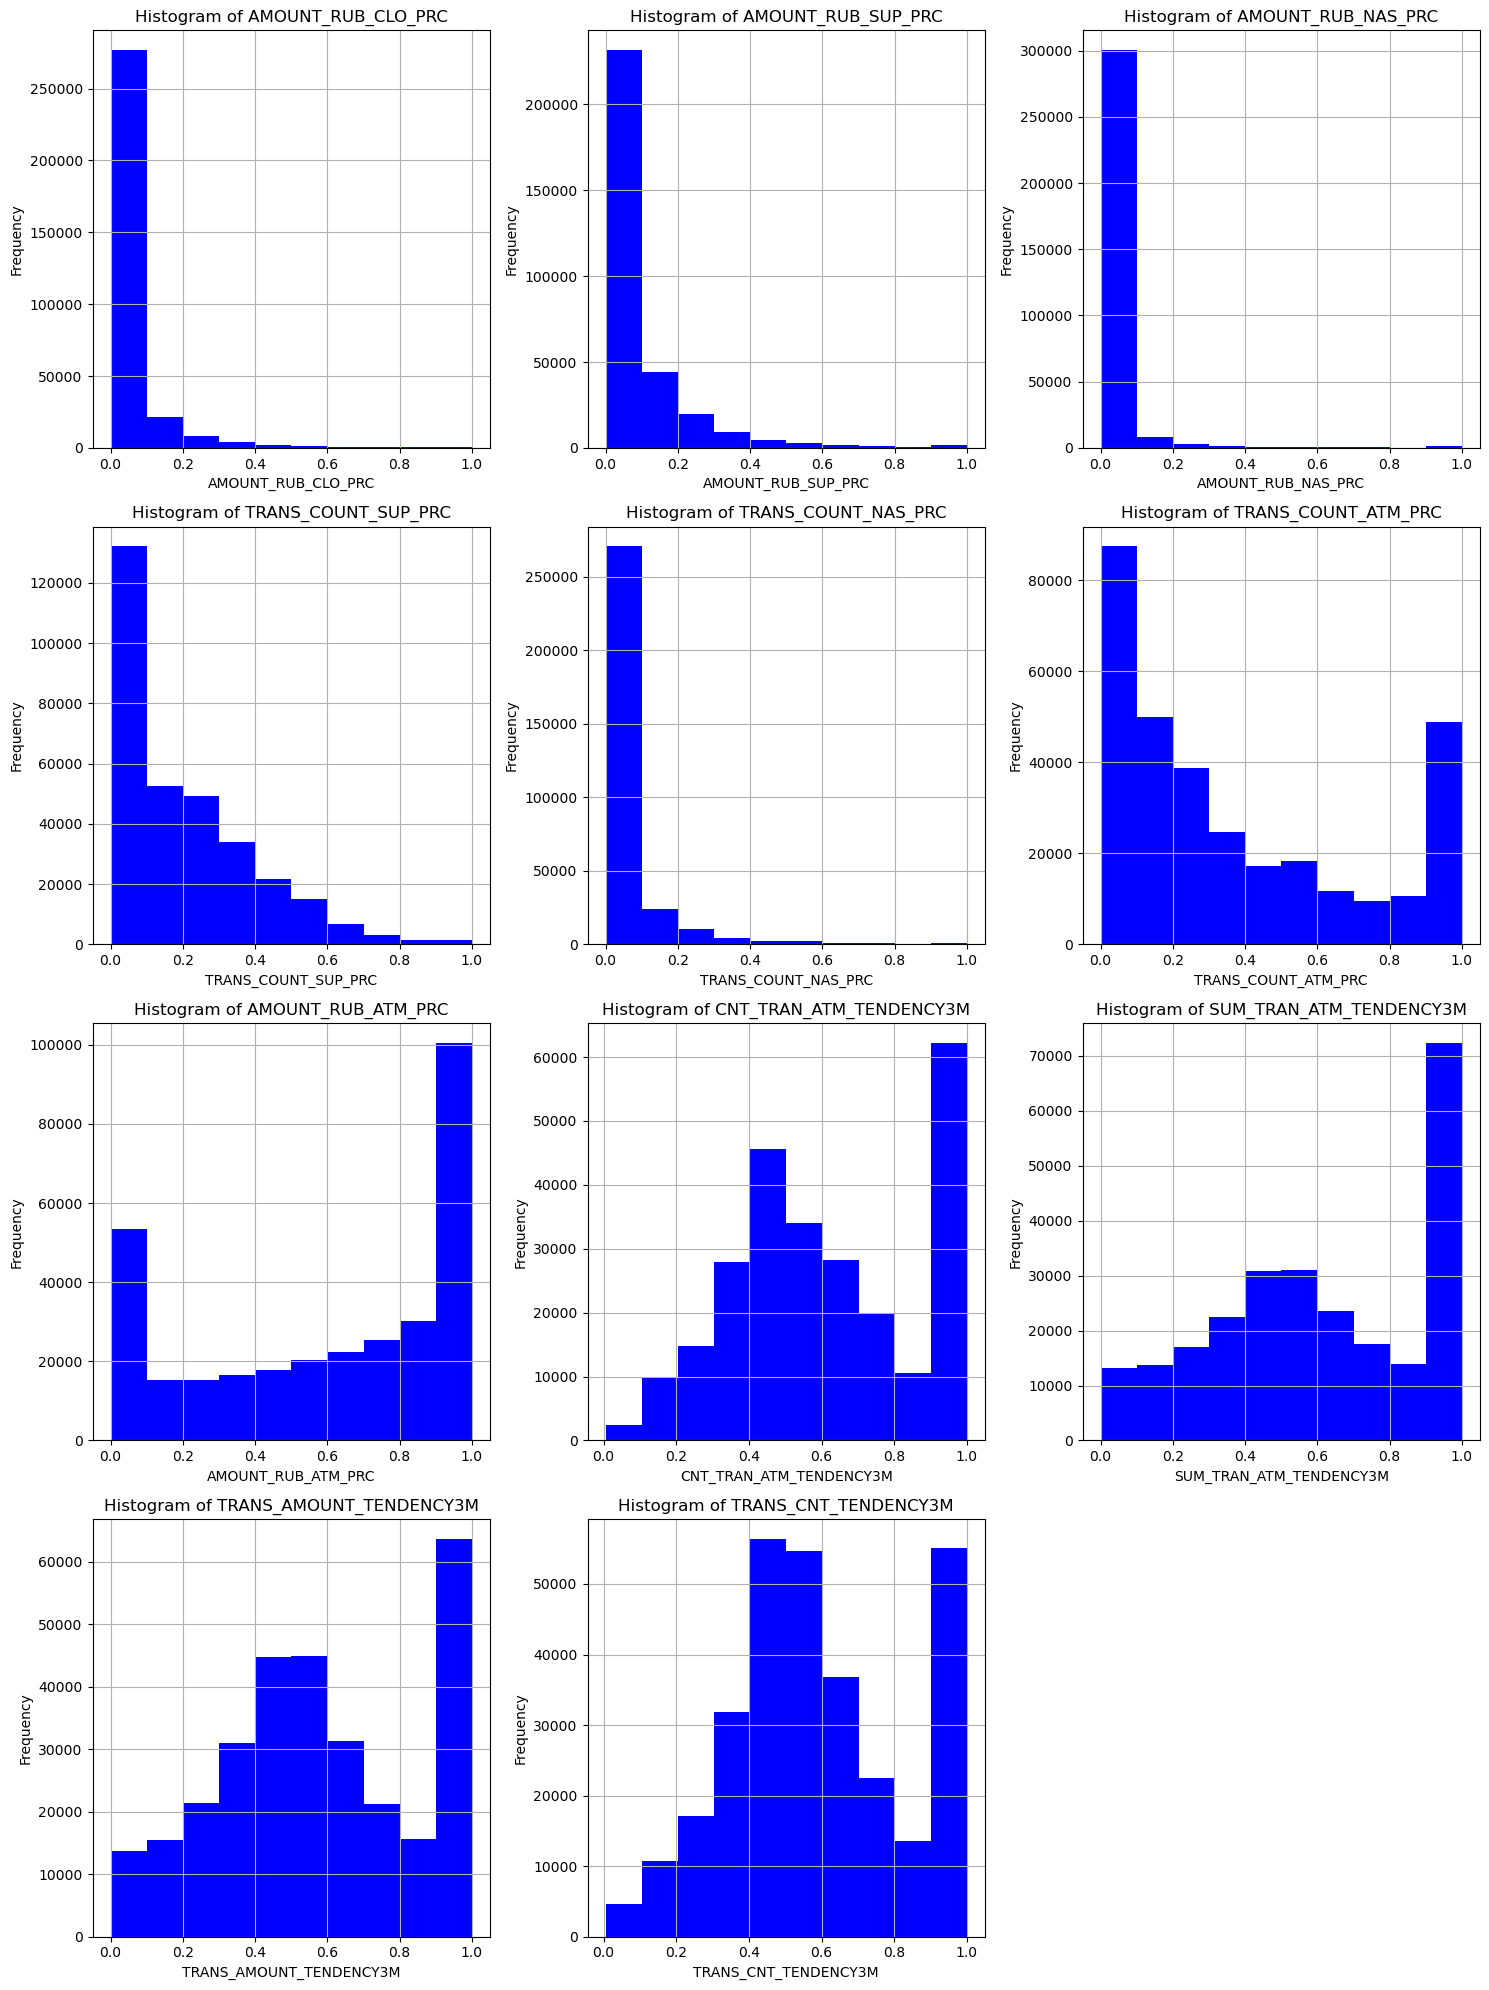

In [12]:
# Filter columns with null values
columns_with_nulls = df.columns[df.isnull().any()]

# Set up subplots for histograms
num_rows = (len(columns_with_nulls) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

# Plot histograms for columns with null values
for i, column in enumerate(columns_with_nulls):
    df[column].hist(ax=axes[i // 3, i % 3], color='blue')
    axes[i // 3, i % 3].set_title(f'Histogram of {column}')
    axes[i // 3, i % 3].set_xlabel(column)
    axes[i // 3, i % 3].set_ylabel('Frequency')

# Hide empty subplots
if len(columns_with_nulls) < num_rows * 3:
    for j in range(len(columns_with_nulls), num_rows * 3):
        axes[j // 3, j % 3].axis('off')

plt.tight_layout()
plt.show()

In [13]:
median_clo_prc = df['AMOUNT_RUB_CLO_PRC'].median()
median_sup_prc = df['AMOUNT_RUB_SUP_PRC'].median()
median_nas_prc = df['AMOUNT_RUB_NAS_PRC'].median()
median_atm_prc = df['AMOUNT_RUB_ATM_PRC'].median()

# Fill null values with the respective median
df['AMOUNT_RUB_CLO_PRC'].fillna(median_clo_prc, inplace=True)
df['AMOUNT_RUB_SUP_PRC'].fillna(median_sup_prc, inplace=True)
df['AMOUNT_RUB_NAS_PRC'].fillna(median_nas_prc, inplace=True)
df['AMOUNT_RUB_ATM_PRC'].fillna(median_atm_prc, inplace=True)

In [14]:
mean_sup_prc = df['TRANS_COUNT_SUP_PRC'].mean()
mean_nas_prc = df['TRANS_COUNT_NAS_PRC'].mean()
mean_atm_prc = df['TRANS_COUNT_ATM_PRC'].mean()

# Fill null values with the respective mean
df['TRANS_COUNT_SUP_PRC'].fillna(mean_sup_prc, inplace=True)
df['TRANS_COUNT_NAS_PRC'].fillna(mean_nas_prc, inplace=True)
df['TRANS_COUNT_ATM_PRC'].fillna(mean_atm_prc, inplace=True)

In [15]:
mean_cnt_tran_atm_tendency3m = df['CNT_TRAN_ATM_TENDENCY3M'].mean()
mean_sum_tran_atm_tendency3m = df['SUM_TRAN_ATM_TENDENCY3M'].mean()

# Fill null values with the respective mean
df['CNT_TRAN_ATM_TENDENCY3M'].fillna(mean_cnt_tran_atm_tendency3m, inplace=True)
df['SUM_TRAN_ATM_TENDENCY3M'].fillna(mean_sum_tran_atm_tendency3m, inplace=True)

In [16]:
mean_trans_amount_tendency3m = df['TRANS_AMOUNT_TENDENCY3M'].mean()
mean_trans_cnt_tendency3m = df['TRANS_CNT_TENDENCY3M'].mean()

# Fill null values with the respective mean
df['TRANS_AMOUNT_TENDENCY3M'].fillna(mean_trans_amount_tendency3m, inplace=True)
df['TRANS_CNT_TENDENCY3M'].fillna(mean_trans_cnt_tendency3m, inplace=True)

In [17]:
df.isnull().sum()

CR_PROD_CNT_IL              0
AMOUNT_RUB_CLO_PRC          0
TURNOVER_DYNAMIC_IL_1M      0
AMOUNT_RUB_SUP_PRC          0
REST_DYNAMIC_FDEP_1M        0
REST_DYNAMIC_SAVE_3M        0
CR_PROD_CNT_VCU             0
REST_AVG_CUR                0
AMOUNT_RUB_NAS_PRC          0
TRANS_COUNT_SUP_PRC         0
TRANS_COUNT_NAS_PRC         0
CR_PROD_CNT_TOVR            0
CR_PROD_CNT_PIL             0
TURNOVER_CC                 0
TRANS_COUNT_ATM_PRC         0
AMOUNT_RUB_ATM_PRC          0
TURNOVER_PAYM               0
AGE                         0
CR_PROD_CNT_CC              0
REST_DYNAMIC_FDEP_3M        0
REST_DYNAMIC_IL_1M          0
CR_PROD_CNT_CCFP            0
REST_DYNAMIC_CUR_1M         0
REST_AVG_PAYM               0
LDEAL_GRACE_DAYS_PCT_MED    0
REST_DYNAMIC_CUR_3M         0
TURNOVER_DYNAMIC_CUR_1M     0
REST_DYNAMIC_PAYM_3M        0
REST_DYNAMIC_IL_3M          0
CNT_TRAN_ATM_TENDENCY3M     0
TURNOVER_DYNAMIC_IL_3M      0
SUM_TRAN_ATM_TENDENCY3M     0
REST_DYNAMIC_PAYM_1M        0
TURNOVER_D

Let's check the overall info of our DataFrame

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CR_PROD_CNT_IL            355190 non-null  int64  
 1   AMOUNT_RUB_CLO_PRC        355190 non-null  float64
 2   TURNOVER_DYNAMIC_IL_1M    355190 non-null  float64
 3   AMOUNT_RUB_SUP_PRC        355190 non-null  float64
 4   REST_DYNAMIC_FDEP_1M      355190 non-null  float64
 5   REST_DYNAMIC_SAVE_3M      355190 non-null  float64
 6   CR_PROD_CNT_VCU           355190 non-null  int64  
 7   REST_AVG_CUR              355190 non-null  float64
 8   AMOUNT_RUB_NAS_PRC        355190 non-null  float64
 9   TRANS_COUNT_SUP_PRC       355190 non-null  float64
 10  TRANS_COUNT_NAS_PRC       355190 non-null  float64
 11  CR_PROD_CNT_TOVR          355190 non-null  int64  
 12  CR_PROD_CNT_PIL           355190 non-null  int64  
 13  TURNOVER_CC               355190 non-null  f

### Let's skip the theory or the EDA part as we can refer it from previous file.

# Feature Engineering

In [19]:
# One hot encoding of "PACK"
encoder = OneHotEncoder()
ohreq = df[['PACK']]
oh_encoded = encoder.fit_transform(ohreq)
oh_df = pd.DataFrame(oh_encoded.toarray(), columns=encoder.get_feature_names_out(['PACK']))
oh_df.index = df.index
df = pd.concat([df, oh_df], axis=1)

# Dropping "PACK" feature afer doing its one hot encoding
df.drop('PACK', axis=1, inplace=True)

Creating new feature "total_turnover"

In [20]:
df['total_turnover'] = df['TURNOVER_DYNAMIC_IL_1M']  + df['TURNOVER_CC'] + df['TURNOVER_PAYM'] + df['TRANS_AMOUNT_TENDENCY3M']

Creating another new feature "TOTAL_PROD_CNT"

In [21]:
df['TOTAL_PROD_CNT'] = df['CR_PROD_CNT_IL'] + df['CR_PROD_CNT_VCU'] + df['CR_PROD_CNT_TOVR'] + df['CR_PROD_CNT_PIL'] + df['CR_PROD_CNT_CC'] + df['CR_PROD_CNT_CCFP']

In [22]:
# Define bin edges and label
bin_edges = [168, 300, 500, 700, 900, 1128]
bin_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# Bin the 'AGE' feature
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bin_edges, labels=bin_labels)

In [23]:
df.drop(columns=['AGE'], inplace=True)

In [24]:
df['TARGET'].value_counts()

TARGET
0    326265
1     28925
Name: count, dtype: int64

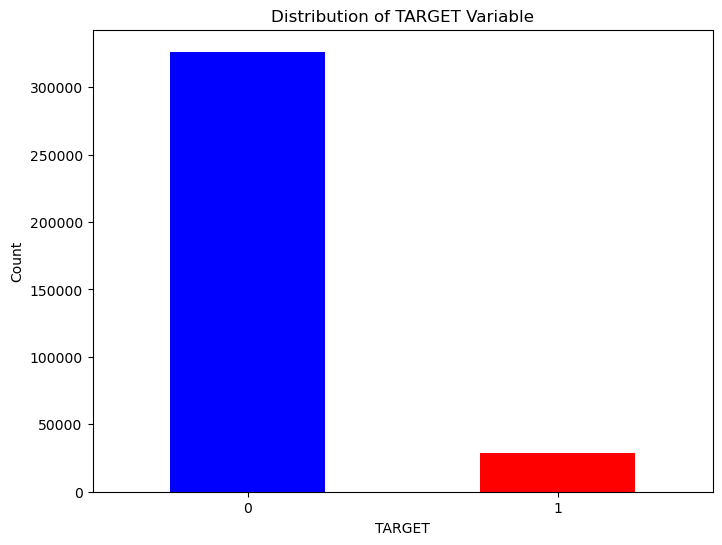

In [25]:
target_counts = df['TARGET'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of TARGET Variable')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We can clearly see that our TARGET variable is imbalanced. We will do undersampling a little later.

In [26]:
df.isnull().sum()

CR_PROD_CNT_IL               0
AMOUNT_RUB_CLO_PRC           0
TURNOVER_DYNAMIC_IL_1M       0
AMOUNT_RUB_SUP_PRC           0
REST_DYNAMIC_FDEP_1M         0
REST_DYNAMIC_SAVE_3M         0
CR_PROD_CNT_VCU              0
REST_AVG_CUR                 0
AMOUNT_RUB_NAS_PRC           0
TRANS_COUNT_SUP_PRC          0
TRANS_COUNT_NAS_PRC          0
CR_PROD_CNT_TOVR             0
CR_PROD_CNT_PIL              0
TURNOVER_CC                  0
TRANS_COUNT_ATM_PRC          0
AMOUNT_RUB_ATM_PRC           0
TURNOVER_PAYM                0
CR_PROD_CNT_CC               0
REST_DYNAMIC_FDEP_3M         0
REST_DYNAMIC_IL_1M           0
CR_PROD_CNT_CCFP             0
REST_DYNAMIC_CUR_1M          0
REST_AVG_PAYM                0
LDEAL_GRACE_DAYS_PCT_MED     0
REST_DYNAMIC_CUR_3M          0
TURNOVER_DYNAMIC_CUR_1M      0
REST_DYNAMIC_PAYM_3M         0
REST_DYNAMIC_IL_3M           0
CNT_TRAN_ATM_TENDENCY3M      0
TURNOVER_DYNAMIC_IL_3M       0
SUM_TRAN_ATM_TENDENCY3M      0
REST_DYNAMIC_PAYM_1M         0
TURNOVER

We can see that after binning age we got some null values. Let's fix it.

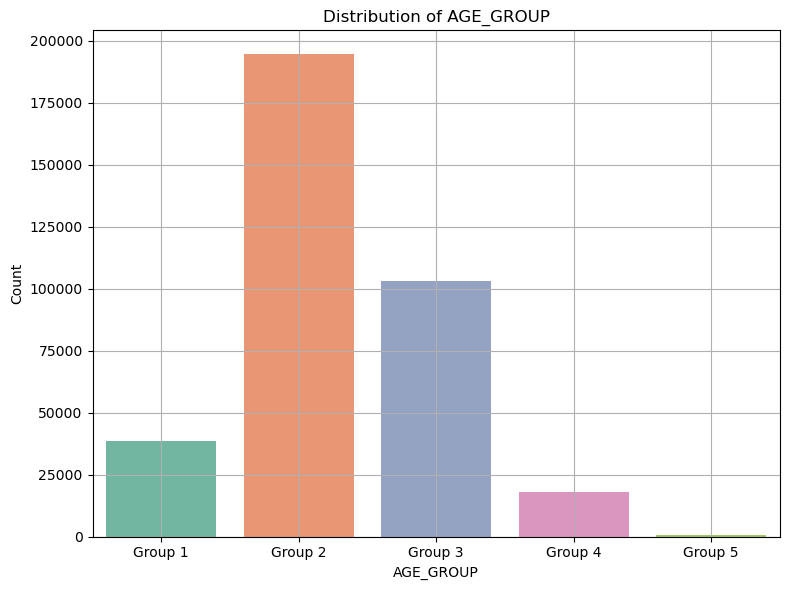

In [27]:
plt.figure(figsize=(8, 6))

# Countplot
sns.countplot(x='AGE_GROUP', data=df, palette='Set2')
plt.title('Distribution of AGE_GROUP')
plt.xlabel('AGE_GROUP')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
mode_age = df['AGE_GROUP'].mode()

# Fill null values with the respective mean
df['AGE_GROUP'].fillna(mode_age, inplace=True)

Here the AGE_GROUP has null values and we can use mode to fill those as it is a categorical column.

In [29]:
# Using one hot encoding to create new features and coverting it into numerical column
encoder = OneHotEncoder()

ohreq = df[['AGE_GROUP']]
oh_encoded = encoder.fit_transform(ohreq)
oh_df = pd.DataFrame(oh_encoded.toarray(), columns=encoder.get_feature_names_out(['AGE_GROUP']))
oh_df.index = df.index
df = pd.concat([df, oh_df], axis=1)

In [30]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()}")

CR_PROD_CNT_IL: 0
AMOUNT_RUB_CLO_PRC: 0
TURNOVER_DYNAMIC_IL_1M: 0
AMOUNT_RUB_SUP_PRC: 0
REST_DYNAMIC_FDEP_1M: 0
REST_DYNAMIC_SAVE_3M: 0
CR_PROD_CNT_VCU: 0
REST_AVG_CUR: 0
AMOUNT_RUB_NAS_PRC: 0
TRANS_COUNT_SUP_PRC: 0
TRANS_COUNT_NAS_PRC: 0
CR_PROD_CNT_TOVR: 0
CR_PROD_CNT_PIL: 0
TURNOVER_CC: 0
TRANS_COUNT_ATM_PRC: 0
AMOUNT_RUB_ATM_PRC: 0
TURNOVER_PAYM: 0
CR_PROD_CNT_CC: 0
REST_DYNAMIC_FDEP_3M: 0
REST_DYNAMIC_IL_1M: 0
CR_PROD_CNT_CCFP: 0
REST_DYNAMIC_CUR_1M: 0
REST_AVG_PAYM: 0
LDEAL_GRACE_DAYS_PCT_MED: 0
REST_DYNAMIC_CUR_3M: 0
TURNOVER_DYNAMIC_CUR_1M: 0
REST_DYNAMIC_PAYM_3M: 0
REST_DYNAMIC_IL_3M: 0
CNT_TRAN_ATM_TENDENCY3M: 0
TURNOVER_DYNAMIC_IL_3M: 0
SUM_TRAN_ATM_TENDENCY3M: 0
REST_DYNAMIC_PAYM_1M: 0
TURNOVER_DYNAMIC_CUR_3M: 0
CLNT_SETUP_TENOR: 0
TURNOVER_DYNAMIC_PAYM_3M: 0
TURNOVER_DYNAMIC_PAYM_1M: 0
TRANS_AMOUNT_TENDENCY3M: 0
TRANS_CNT_TENDENCY3M: 0
REST_DYNAMIC_CC_1M: 0
TURNOVER_DYNAMIC_CC_1M: 0
REST_DYNAMIC_CC_3M: 0
TURNOVER_DYNAMIC_CC_3M: 0
TARGET: 0
PACK_101: 0
PACK_102: 0
PACK_103:

In [31]:
df.drop('AGE_GROUP', axis=1,inplace=True)
df.drop('AGE_GROUP_nan', axis=1,inplace=True)

Let's specify the Target and Features.

In [32]:
# Target variable
y = df['TARGET']
  
 # Features
X = df.drop(columns=['TARGET'])

# Let's split the data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Now, let's do undersampling.

In [34]:
def perform_random_undersampling(X_train, y_train):
    """
    Undersample the majority class using RandomUnderSampler.

    Parameters:
    X_train : DataFrame or array-like
        Features of the training data.
    y_train : Series or array-like
        Target labels of the training data.

    Returns:
    X_train_undersampled : DataFrame or array-like
        Undersampled features of the training data.
    y_train_undersampled : Series or array-like
        Undersampled target labels of the training data.
    """
    # Initialize RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)
    
    # Perform undersampling
    X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
    
    return X_train_undersampled, y_train_undersampled

In [35]:
X_train_undersampled, y_train_undersampled = perform_random_undersampling(X_train, y_train)

In [36]:
# Before undersampling
print("Before undersampling:")
print(y_train.value_counts())

# After undersampling
print("\nAfter undersampling:")
print(y_train_undersampled.value_counts())

Before undersampling:
TARGET
0    228299
1     20334
Name: count, dtype: int64

After undersampling:
TARGET
0    20334
1    20334
Name: count, dtype: int64


#### Let's perform Scaling

In [37]:
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train_undersampled)

# Transform the test features using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

# Decision Tree

In [38]:
# Define the Decision Tree classifier with some initial hyperparameters
clf = DecisionTreeClassifier()

In [39]:
# Fit the model on the training data
clf.fit(X_train_scaled, y_train_undersampled)

DecisionTreeClassifier()

In [40]:
# Predict on the training set
y_train_pred = clf.predict(X_train_scaled)

In [41]:
# Calculate evaluation metrics on the training set
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred)
train_precision = precision_score(y_train_undersampled, y_train_pred)
train_recall = recall_score(y_train_undersampled, y_train_pred)
train_f1_score = f1_score(y_train_undersampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_undersampled, y_train_pred)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1_score}")
print(f"ROC AUC Score: {train_roc_auc}")

Training Set Metrics:
Accuracy: 0.9998770532113701
Precision: 1.0
Recall: 0.9997541064227402
F1 Score: 0.9998770380935986
ROC AUC Score: 0.9998770532113701


In [42]:
# Predict on the test set
y_test_pred = clf.predict(X_test_scaled)

In [43]:
# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")
print(f"ROC AUC Score: {test_roc_auc}")


Test Set Metrics:
Accuracy: 0.6778343984909485
Precision: 0.15368675995694295
Recall: 0.6647654522174369
F1 Score: 0.24965574522961248
ROC AUC Score: 0.6718729574134568


## Empirical tuning 

#### Round 1: Varying max_depth:

In [44]:
# Define the parameter grid for GridSearchCV
param_grid_max_depth = {'max_depth': [10]}

In [45]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [46]:
# Initialize GridSearchCV
grid_search_max_depth = GridSearchCV(clf, param_grid=param_grid_max_depth, cv=10, scoring='accuracy')

In [47]:
# Fit GridSearchCV to the training data
grid_search_max_depth.fit(X_train_scaled, y_train_undersampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10]}, scoring='accuracy')

In [48]:
# Get the best estimator
best_clf_max_depth = grid_search_max_depth.best_estimator_

In [49]:
# Predict on the training set
y_train_pred_max_depth = best_clf_max_depth.predict(X_train_scaled)

In [50]:
# Calculate evaluation metrics on the training set
train_accuracy_max_depth = accuracy_score(y_train_undersampled, y_train_pred_max_depth)
train_precision_max_depth = precision_score(y_train_undersampled, y_train_pred_max_depth)
train_recall_max_depth = recall_score(y_train_undersampled, y_train_pred_max_depth)
train_f1_score_max_depth = f1_score(y_train_undersampled, y_train_pred_max_depth)
train_roc_auc_max_depth = roc_auc_score(y_train_undersampled, y_train_pred_max_depth)

In [51]:
# Predict on the test set
y_test_pred_max_depth = best_clf_max_depth.predict(X_test_scaled)

In [52]:
# Calculate evaluation metrics on the test set
test_accuracy_max_depth = accuracy_score(y_test, y_test_pred_max_depth)
test_precision_max_depth = precision_score(y_test, y_test_pred_max_depth)
test_recall_max_depth = recall_score(y_test, y_test_pred_max_depth)
test_f1_score_max_depth = f1_score(y_test, y_test_pred_max_depth)
test_roc_auc_max_depth = roc_auc_score(y_test, y_test_pred_max_depth)

print("Round 1: Varying max_depth")
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy_max_depth}")
print(f"Precision: {train_precision_max_depth}")
print(f"Recall: {train_recall_max_depth}")
print(f"F1 Score: {train_f1_score_max_depth}")
print(f"ROC AUC Score: {train_roc_auc_max_depth}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_max_depth}")
print(f"Precision: {test_precision_max_depth}")
print(f"Recall: {test_recall_max_depth}")
print(f"F1 Score: {test_f1_score_max_depth}")
print(f"ROC AUC Score: {test_roc_auc_max_depth}")

# Get the best parameters
best_params_max_depth = grid_search_max_depth.best_params_

print("\nBest Parameters for max_depth:")
print(best_params_max_depth)

Round 1: Varying max_depth

Training Set Metrics:
Accuracy: 0.7952935969312481
Precision: 0.7783598349636085
Recall: 0.8257106324382807
F1 Score: 0.8013363560434315
ROC AUC Score: 0.7952935969312481

Test Set Metrics:
Accuracy: 0.7070488095573261
Precision: 0.18382291288185806
Recall: 0.7655686183214993
F1 Score: 0.2964615731350011
ROC AUC Score: 0.7337428049654167

Best Parameters for max_depth:
{'max_depth': 10}


#### Round 2: Varying min_samples_split:

In [53]:
# Define the parameter grid for GridSearchCV
param_grid_min_samples_split = {'min_samples_split': [40, 50]}

In [54]:
# Initialize GridSearchCV
grid_search_min_samples_split = GridSearchCV(clf, param_grid=param_grid_min_samples_split, cv=10, scoring='accuracy')

In [55]:
# Fit GridSearchCV to the training data
grid_search_min_samples_split.fit(X_train_scaled, y_train_undersampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_samples_split': [40, 50]}, scoring='accuracy')

In [56]:
# Get the best estimator
best_clf_min_samples_split = grid_search_min_samples_split.best_estimator_

In [57]:
# Predict on the training set
y_train_pred_min_samples_split = best_clf_min_samples_split.predict(X_train_scaled)

In [58]:
# Calculate evaluation metrics on the training set
train_accuracy_min_samples_split = accuracy_score(y_train_undersampled, y_train_pred_min_samples_split)
train_precision_min_samples_split = precision_score(y_train_undersampled, y_train_pred_min_samples_split)
train_recall_min_samples_split = recall_score(y_train_undersampled, y_train_pred_min_samples_split)
train_f1_score_min_samples_split = f1_score(y_train_undersampled, y_train_pred_min_samples_split)
train_roc_auc_min_samples_split = roc_auc_score(y_train_undersampled, y_train_pred_min_samples_split)

# Predict on the test set
y_test_pred_min_samples_split = best_clf_min_samples_split.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy_min_samples_split = accuracy_score(y_test, y_test_pred_min_samples_split)
test_precision_min_samples_split = precision_score(y_test, y_test_pred_min_samples_split)
test_recall_min_samples_split = recall_score(y_test, y_test_pred_min_samples_split)
test_f1_score_min_samples_split = f1_score(y_test, y_test_pred_min_samples_split)
test_roc_auc_min_samples_split = roc_auc_score(y_test, y_test_pred_min_samples_split)

print("Round 2: Varying min_samples_split")
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy_min_samples_split}")
print(f"Precision: {train_precision_min_samples_split}")
print(f"Recall: {train_recall_min_samples_split}")
print(f"F1 Score: {train_f1_score_min_samples_split}")
print(f"ROC AUC Score: {train_roc_auc_min_samples_split}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_min_samples_split}")
print(f"Precision: {test_precision_min_samples_split}")
print(f"Recall: {test_recall_min_samples_split}")
print(f"F1 Score: {test_f1_score_min_samples_split}")
print(f"ROC AUC Score: {test_roc_auc_min_samples_split}")

# Get the best parameters
best_params_min_samples_split = grid_search_min_samples_split.best_params_

print("\nBest Parameters for min_samples_split:")
print(best_params_min_samples_split)

Round 2: Varying min_samples_split

Training Set Metrics:
Accuracy: 0.8367020753417921
Precision: 0.831887149158951
Recall: 0.8439559358709551
F1 Score: 0.8378780851011888
ROC AUC Score: 0.8367020753417921

Test Set Metrics:
Accuracy: 0.7029852567170622
Precision: 0.17399049881235154
Recall: 0.7162146432312886
F1 Score: 0.2799681492435445
ROC AUC Score: 0.7090198831165732

Best Parameters for min_samples_split:
{'min_samples_split': 50}


#### Varying min_samples_leaf:

In [59]:
# Define the parameter grid for GridSearchCV
param_grid_min_samples_leaf = {'min_samples_leaf': [30, 40, 50]}

In [60]:
# Initialize GridSearchCV
grid_search_min_samples_leaf = GridSearchCV(clf, param_grid=param_grid_min_samples_leaf, cv=10, scoring='accuracy')

In [61]:
# Fit GridSearchCV to the training data
grid_search_min_samples_leaf.fit(X_train_scaled, y_train_undersampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_samples_leaf': [30, 40, 50]}, scoring='accuracy')

In [62]:
# Get the best estimator
best_clf_min_samples_leaf = grid_search_min_samples_leaf.best_estimator_

In [63]:
# Predict on the training set
y_train_pred_min_samples_leaf = best_clf_min_samples_leaf.predict(X_train_scaled)

# Calculate evaluation metrics on the training set
train_accuracy_min_samples_leaf = accuracy_score(y_train_undersampled, y_train_pred_min_samples_leaf)
train_precision_min_samples_leaf = precision_score(y_train_undersampled, y_train_pred_min_samples_leaf)
train_recall_min_samples_leaf = recall_score(y_train_undersampled, y_train_pred_min_samples_leaf)
train_f1_score_min_samples_leaf = f1_score(y_train_undersampled, y_train_pred_min_samples_leaf)
train_roc_auc_min_samples_leaf = roc_auc_score(y_train_undersampled, y_train_pred_min_samples_leaf)

# Predict on the test set
y_test_pred_min_samples_leaf = best_clf_min_samples_leaf.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy_min_samples_leaf = accuracy_score(y_test, y_test_pred_min_samples_leaf)
test_precision_min_samples_leaf = precision_score(y_test, y_test_pred_min_samples_leaf)
test_recall_min_samples_leaf = recall_score(y_test, y_test_pred_min_samples_leaf)
test_f1_score_min_samples_leaf = f1_score(y_test, y_test_pred_min_samples_leaf)
test_roc_auc_min_samples_leaf = roc_auc_score(y_test, y_test_pred_min_samples_leaf)

print("Round 3: Varying min_samples_leaf")
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy_min_samples_leaf}")
print(f"Precision: {train_precision_min_samples_leaf}")
print(f"Recall: {train_recall_min_samples_leaf}")
print(f"F1 Score: {train_f1_score_min_samples_leaf}")
print(f"ROC AUC Score: {train_roc_auc_min_samples_leaf}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_min_samples_leaf}")
print(f"Precision: {test_precision_min_samples_leaf}")
print(f"Recall: {test_recall_min_samples_leaf}")
print(f"F1 Score: {test_f1_score_min_samples_leaf}")
print(f"ROC AUC Score: {test_roc_auc_min_samples_leaf}")

# Get the best parameters
best_params_min_samples_leaf = grid_search_min_samples_leaf.best_params_

print("\nBest Parameters for min_samples_leaf:")
print(best_params_min_samples_leaf)


Round 3: Varying min_samples_leaf

Training Set Metrics:
Accuracy: 0.7746631257991541
Precision: 0.753610026337299
Recall: 0.816169961640602
F1 Score: 0.7836434035319672
ROC AUC Score: 0.7746631257991542

Test Set Metrics:
Accuracy: 0.7000947849507775
Precision: 0.18171416117256034
Recall: 0.7763939005936445
F1 Score: 0.29450073956332645
ROC AUC Score: 0.7348988672884317

Best Parameters for min_samples_leaf:
{'min_samples_leaf': 50}


### ALL EMPIRICAL TUNING TOGETHER

In [64]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [65]:
# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [10],'min_samples_split': [50],'min_samples_leaf': [50]}

In [66]:
# Initialize GridSearchCV with fewer CV folds
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [67]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train_undersampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10], 'min_samples_leaf': [50],
                         'min_samples_split': [50]},
             scoring='accuracy')

In [68]:
# Get the best estimator and best parameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

In [69]:
# Predict on the training set
y_train_pred = best_clf.predict(X_train_scaled)

# Calculate evaluation metrics on the training set
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred)
train_precision = precision_score(y_train_undersampled, y_train_pred)
train_recall = recall_score(y_train_undersampled, y_train_pred)
train_f1_score = f1_score(y_train_undersampled, y_train_pred)
train_roc_auc = roc_auc_score(y_train_undersampled, y_train_pred)

# Predict on the test set
y_test_pred = best_clf.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the best parameters and evaluation metrics
print("Best Parameters:")
print(best_params)
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1_score}")
print(f"ROC AUC Score: {train_roc_auc}")
print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1_score}")
print(f"ROC AUC Score: {test_roc_auc}")

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

Training Set Metrics:
Accuracy: 0.7689338054490017
Precision: 0.7532064638607214
Recall: 0.7999901642569096
F1 Score: 0.775893730175765
ROC AUC Score: 0.7689338054490017

Test Set Metrics:
Accuracy: 0.7090008164644275
Precision: 0.18496866128896258
Recall: 0.7660342218600862
F1 Score: 0.297985057731492
ROC AUC Score: 0.7350167842861055


In [70]:
# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [10],'min_samples_split': [50],'min_samples_leaf': [50]}

In [71]:
# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [72]:
# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, scoring='accuracy')

In [73]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train_undersampled)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10], 'min_samples_leaf': [50],
                         'min_samples_split': [50]},
             scoring='accuracy')

In [74]:
# Get the best estimator
best_clf = grid_search.best_estimator_

## Sensitivity Analysis

In [75]:
problem = {
    'num_vars': 3,
    'names': ['max_depth', 'min_samples_split', 'min_samples_leaf'],
    'bounds': [[1, 20], [2, 100], [1, 100]]
}

# Sample the parameter space using Saltelli's sampler
param_values = saltelli.sample(problem, 10)

# Initialize arrays to store model outputs
Y_train_outputs = np.zeros([param_values.shape[0]])
Y_test_outputs = np.zeros([param_values.shape[0]])

# Run the model with different parameter values
for i, params in enumerate(param_values):
    clf = DecisionTreeClassifier(
        max_depth=int(params[0]),
        min_samples_split=int(params[1]),
        min_samples_leaf=int(params[2]),
        random_state=42
    )

    # Fit the model to the training data
    clf.fit(X_train_scaled, y_train_undersampled)

    # Predict on the training set
    y_train_pred = clf.predict(X_train_scaled)

    # Calculate evaluation metrics on the training set
    Y_train_outputs[i] = accuracy_score(y_train_undersampled, y_train_pred)

# Perform sensitivity analysis using Sobol indices
Si = sobol.analyze(problem, Y_train_outputs, print_to_console=True)

                         ST   ST_conf
max_depth          1.176432  0.581052
min_samples_split  0.005554  0.012075
min_samples_leaf   0.062788  0.083727
                         S1   S1_conf
max_depth          1.132364  0.916500
min_samples_split -0.010681  0.020115
min_samples_leaf  -0.298669  0.370313
                                             S2   S2_conf
(max_depth, min_samples_split)        -0.042498  1.489239
(max_depth, min_samples_leaf)          0.307584  1.031127
(min_samples_split, min_samples_leaf)  0.020674  0.041824


## Feature Importance

                     Feature  Importance
7               REST_AVG_CUR    0.373253
21       REST_DYNAMIC_CUR_1M    0.205796
15        AMOUNT_RUB_ATM_PRC    0.123591
31      REST_DYNAMIC_PAYM_1M    0.059606
22             REST_AVG_PAYM    0.042386
24       REST_DYNAMIC_CUR_3M    0.034861
25   TURNOVER_DYNAMIC_CUR_1M    0.034575
33          CLNT_SETUP_TENOR    0.018259
14       TRANS_COUNT_ATM_PRC    0.017532
35  TURNOVER_DYNAMIC_PAYM_1M    0.014421
51                  PACK_K01    0.013561
32   TURNOVER_DYNAMIC_CUR_3M    0.011119
37      TRANS_CNT_TENDENCY3M    0.010574
3         AMOUNT_RUB_SUP_PRC    0.004098
54            total_turnover    0.003562
36   TRANS_AMOUNT_TENDENCY3M    0.003446
26      REST_DYNAMIC_PAYM_3M    0.003278
56         AGE_GROUP_Group 1    0.003056
30   SUM_TRAN_ATM_TENDENCY3M    0.002998
16             TURNOVER_PAYM    0.002633
1         AMOUNT_RUB_CLO_PRC    0.002508
19        REST_DYNAMIC_IL_1M    0.002412
34  TURNOVER_DYNAMIC_PAYM_3M    0.002346
10       TRANS_C

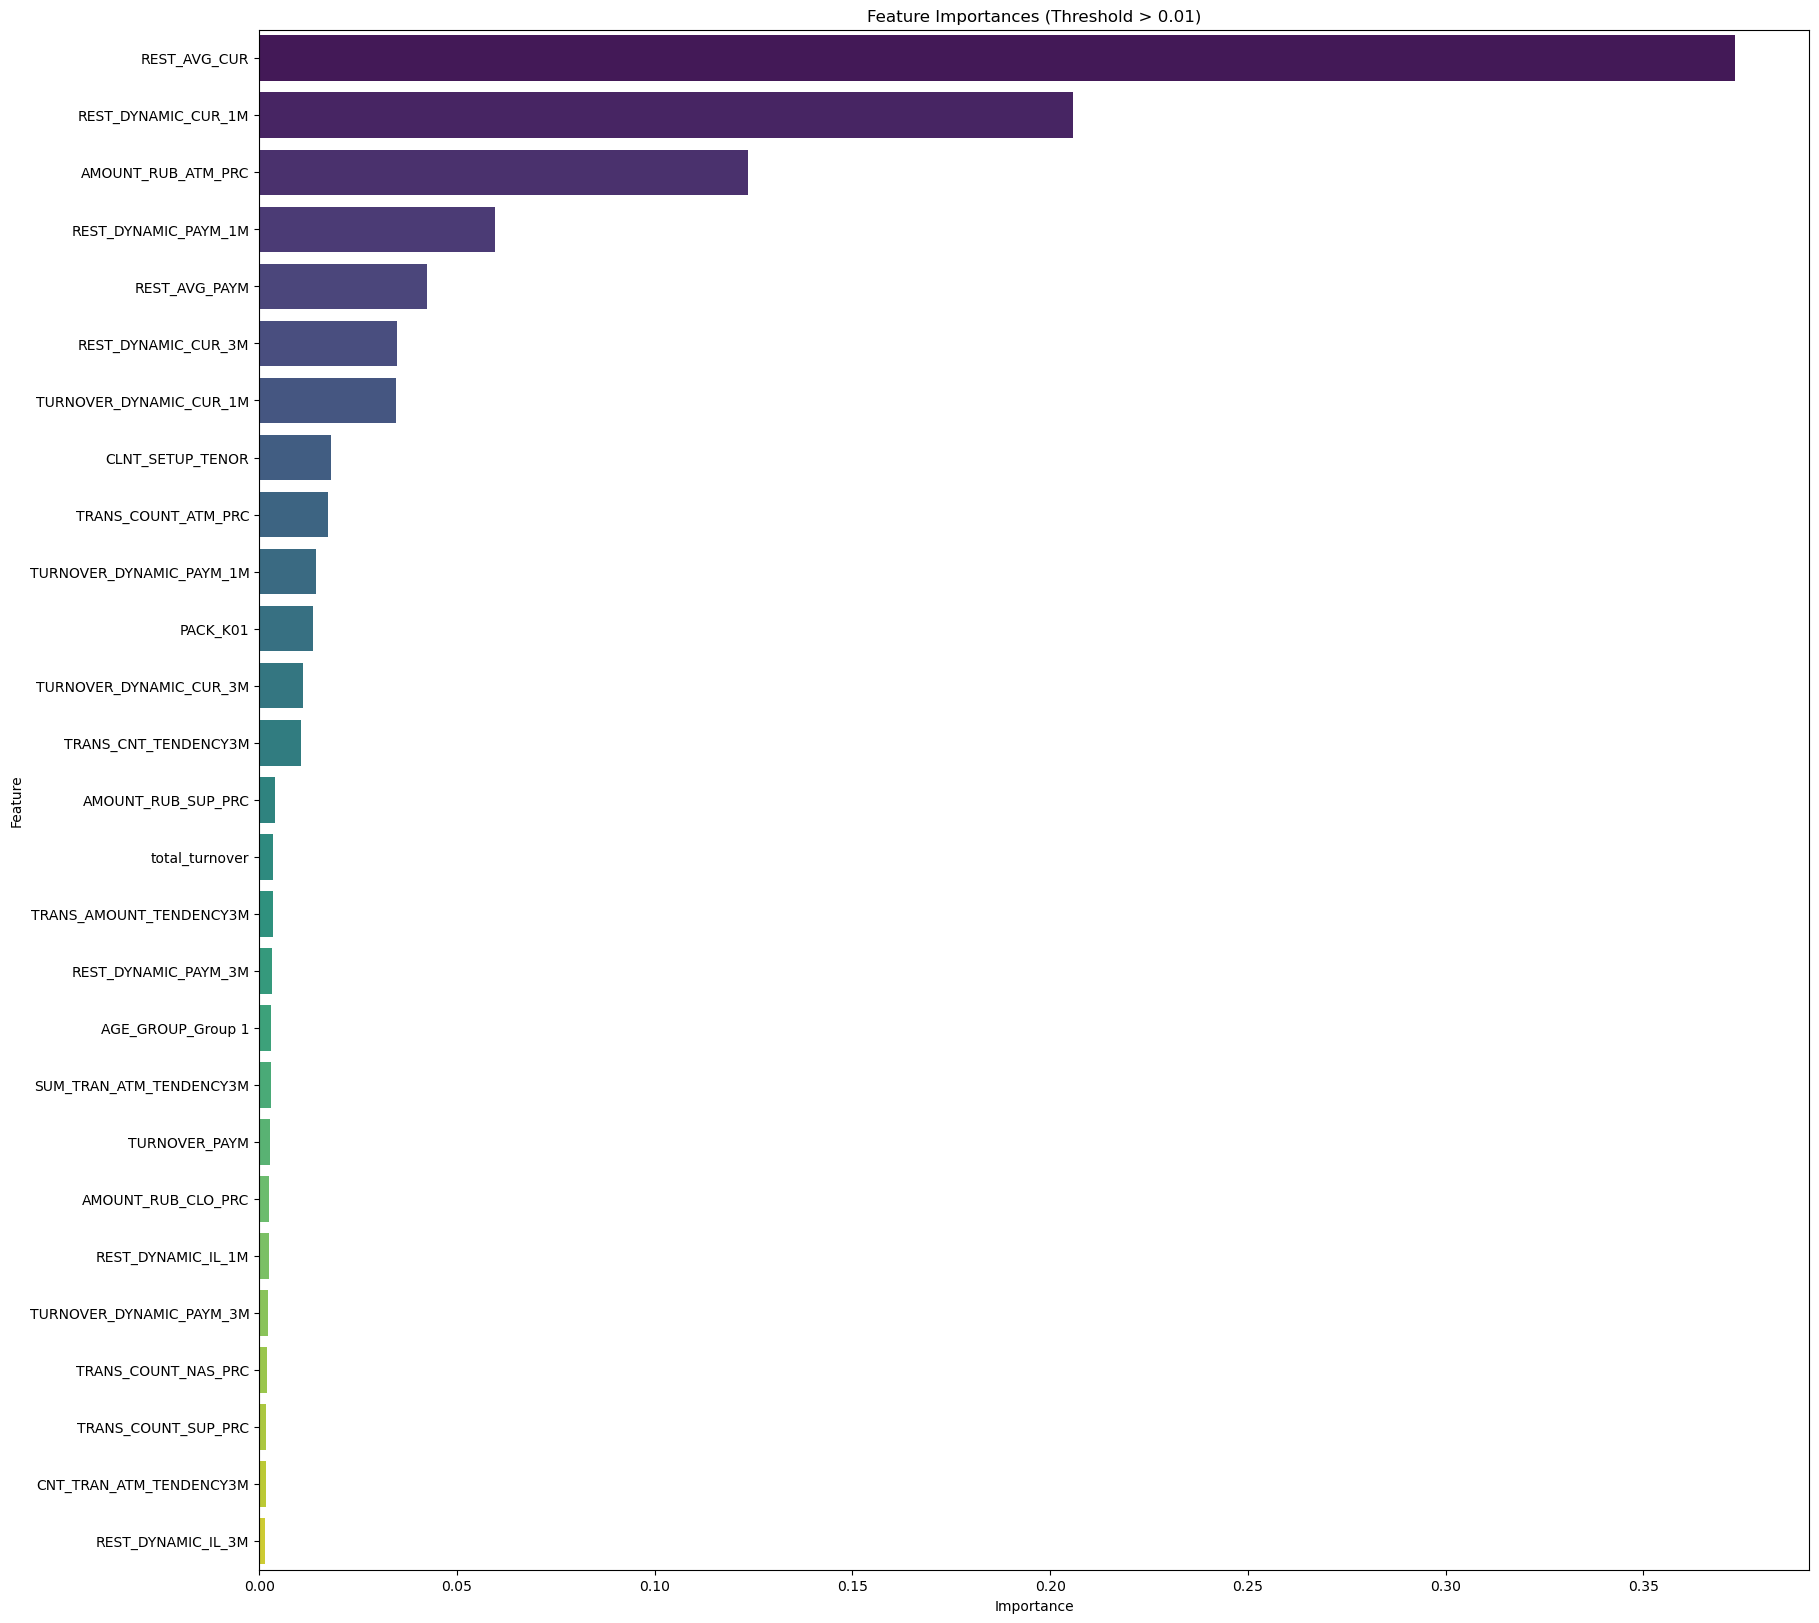

In [76]:
# Get feature importances from the best classifier
feature_importances = best_clf.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Filter features based on the threshold
threshold = 0.001
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Sort the DataFrame by feature importances in descending order
selected_features = selected_features.sort_values(by='Importance', ascending=False)

# Print the selected features
print(selected_features)

# Plot the feature importances
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=selected_features, palette='viridis')
plt.title('Feature Importances (Threshold > 0.01)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Local Feature Importance

In [103]:
# Choose three random indices from the test set
random_indices = random.sample(range(len(X_test_scaled)), 3)

# Extract instances using the selected random indices
instances_to_interpret = X_test_scaled[random_indices]

In [104]:
# Calculate permutation importance for local feature importance
perm_importance = permutation_importance(best_clf, instances_to_interpret, y_test.values[random_indices], n_repeats=10, random_state=42)

In [105]:
# Create a DataFrame to store local feature importance along with their corresponding feature names
local_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance['importances_mean']})

In [106]:
# Filter out features with zero or negative importance
local_feature_importance_df = local_feature_importance_df[local_feature_importance_df['Importance'] > 0]

# Sort the DataFrame by feature importance in descending order
local_feature_importance_df = local_feature_importance_df.sort_values(by='Importance', ascending=False)


Instance 1 (Index 42302):
22    0.366667
31    0.300000
15    0.266667
37    0.100000
Name: Importance, dtype: float64

Instance 2 (Index 37247):
22    0.366667
31    0.300000
15    0.266667
37    0.100000
Name: Importance, dtype: float64

Instance 3 (Index 67463):
22    0.366667
31    0.300000
15    0.266667
37    0.100000
Name: Importance, dtype: float64


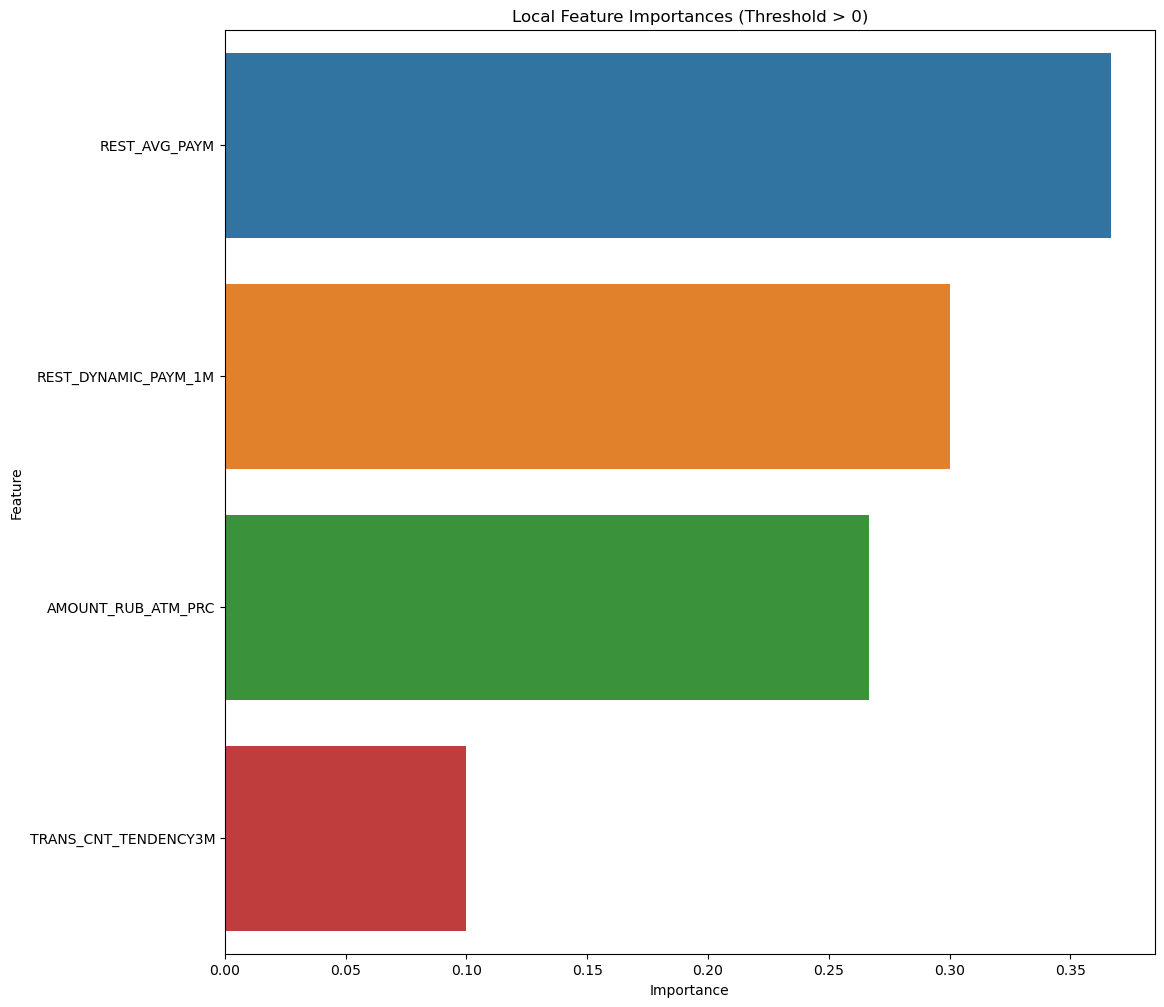

In [107]:
# Print the local feature importances for each instance
for idx, instance_idx in enumerate(random_indices):
    print(f"\nInstance {idx + 1} (Index {instance_idx}):")
    instance_local_importance = local_feature_importance_df['Importance']
    print(instance_local_importance)

# Plot the local feature importances
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=local_feature_importance_df)
plt.title('Local Feature Importances (Threshold > 0)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Global Feature Importance

In [82]:
# Choose one random index from the test set
random_index = random.choice(range(len(X_test_scaled)))

# Extract the instance using the selected random index
instance_to_interpret = X_test_scaled[random_index]


In [83]:
# Get feature importances from the best classifier
feature_importances = best_clf.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
global_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})



Global Feature Importances for Instance 33882:
                     Feature  Importance
7               REST_AVG_CUR    0.373253
21       REST_DYNAMIC_CUR_1M    0.205796
15        AMOUNT_RUB_ATM_PRC    0.123591
31      REST_DYNAMIC_PAYM_1M    0.059606
22             REST_AVG_PAYM    0.042386
24       REST_DYNAMIC_CUR_3M    0.034861
25   TURNOVER_DYNAMIC_CUR_1M    0.034575
33          CLNT_SETUP_TENOR    0.018259
14       TRANS_COUNT_ATM_PRC    0.017532
35  TURNOVER_DYNAMIC_PAYM_1M    0.014421
51                  PACK_K01    0.013561
32   TURNOVER_DYNAMIC_CUR_3M    0.011119
37      TRANS_CNT_TENDENCY3M    0.010574


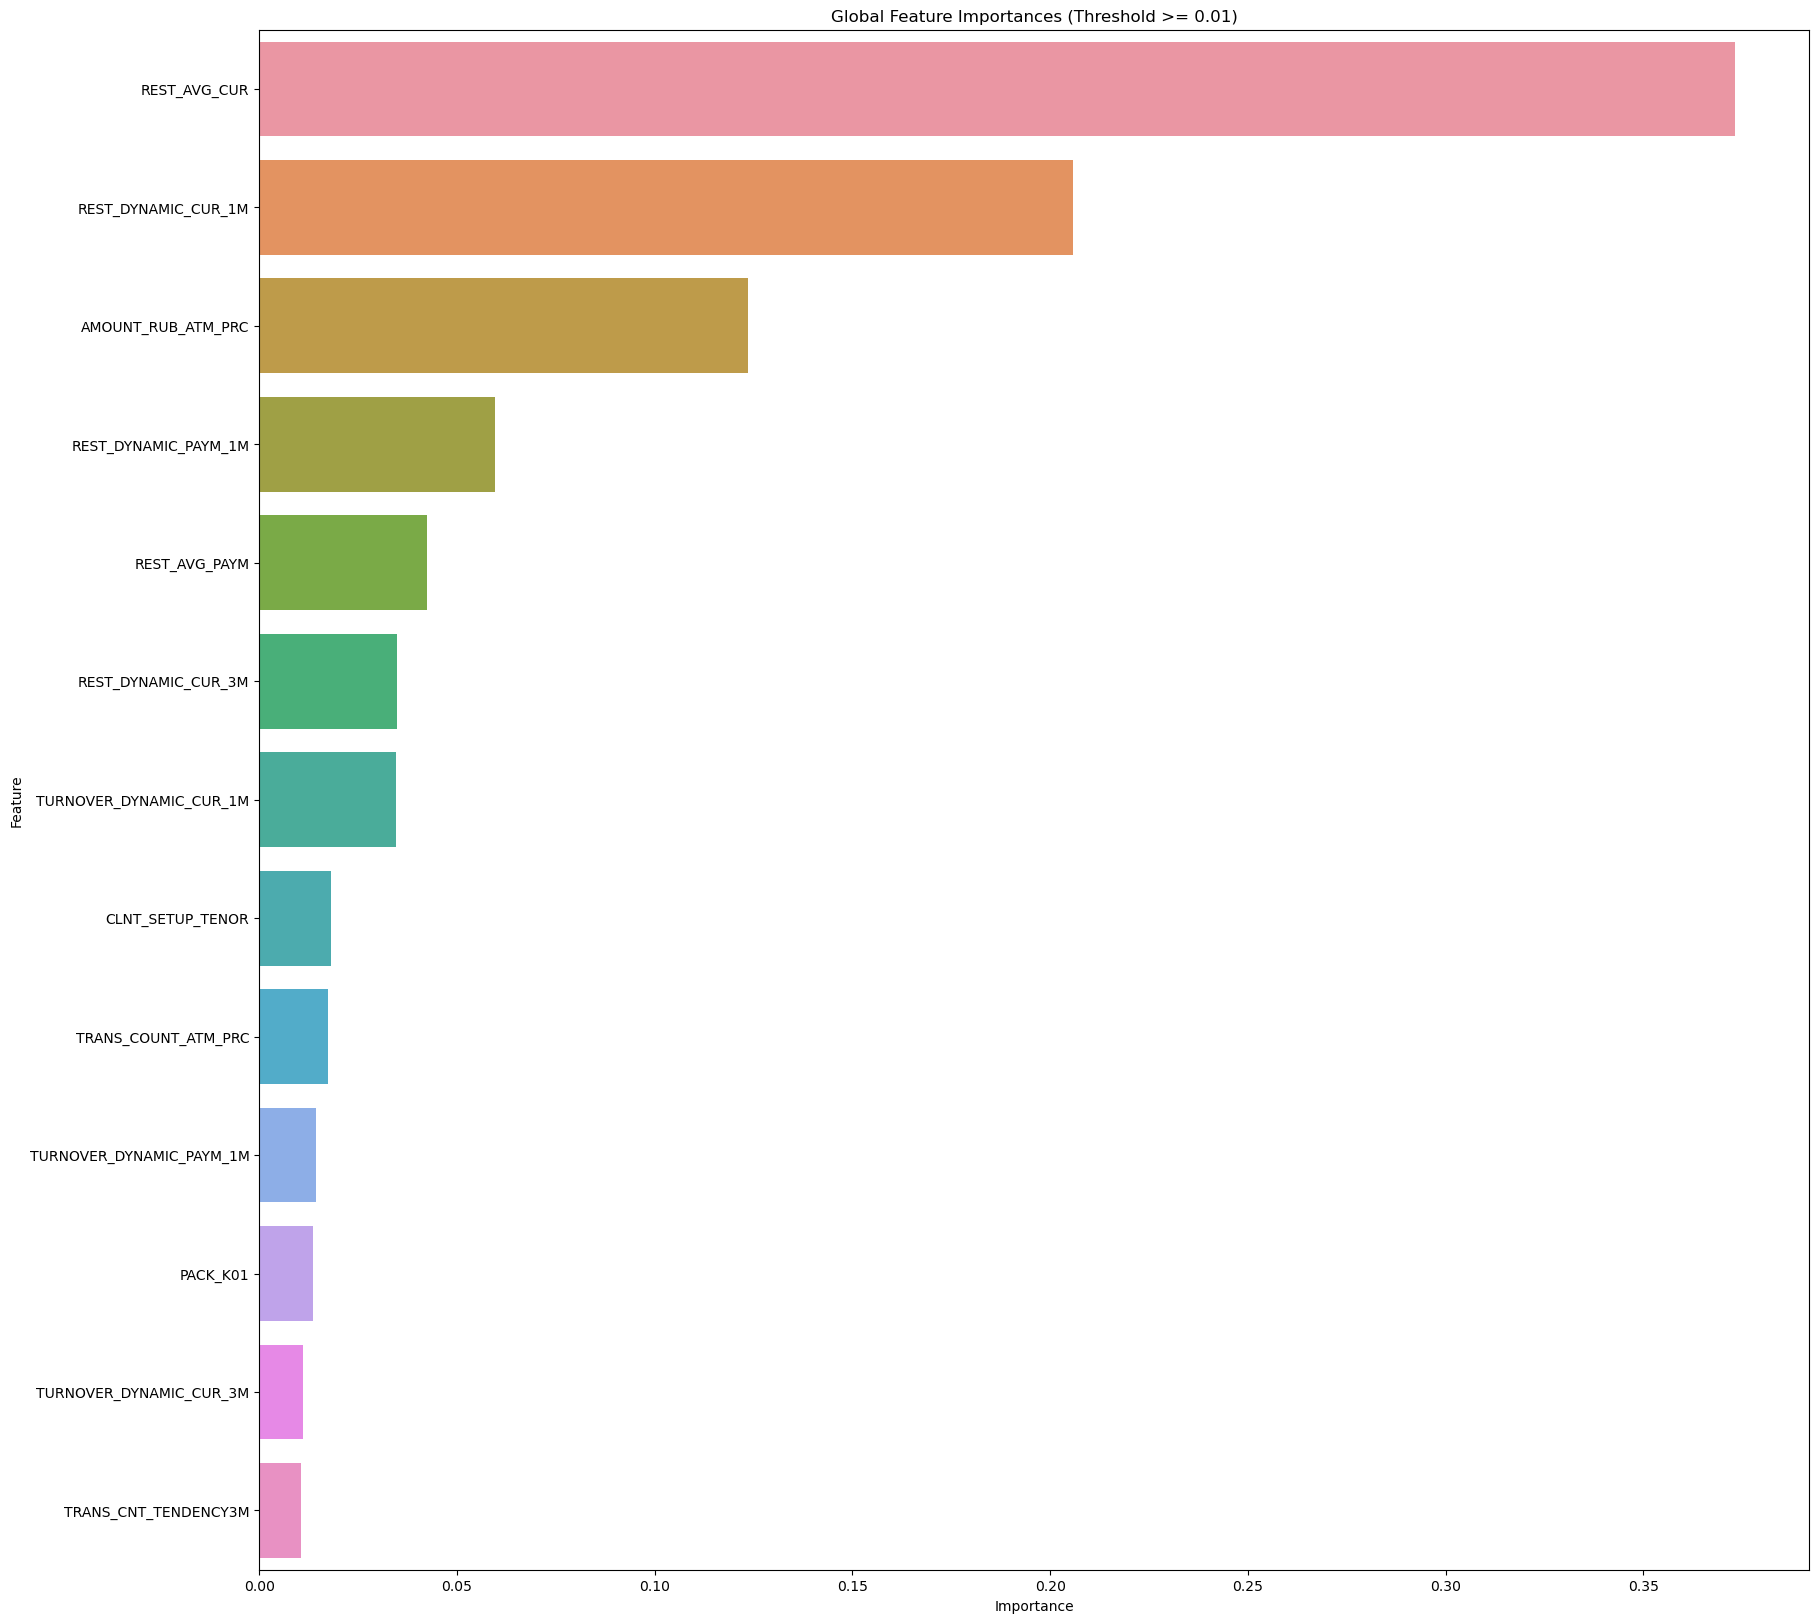

In [84]:
# Filter out features with importance below the threshold
threshold = 0.01
global_feature_importance_df = global_feature_importance_df[global_feature_importance_df['Importance'] >= threshold]

# Sort the DataFrame by feature importance in descending order
global_feature_importance_df = global_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the global feature importances for the selected instance
print(f"\nGlobal Feature Importances for Instance {random_index}:")
print(global_feature_importance_df)

# Plot the global feature importances
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=global_feature_importance_df)
plt.title('Global Feature Importances (Threshold >= 0.01)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Random Forest

In [85]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

In [86]:
# Train the classifier
rf_classifier.fit(X_train_scaled, y_train_undersampled)

RandomForestClassifier()

In [87]:
# Predict on training data
y_train_pred = rf_classifier.predict(X_train_scaled)

# Predict on testing data
y_test_pred = rf_classifier.predict(X_test_scaled)

In [88]:
# Calculate evaluation metrics for training data
accuracy_train = accuracy_score(y_train_undersampled, y_train_pred)
precision_train = precision_score(y_train_undersampled, y_train_pred)
recall_train = recall_score(y_train_undersampled, y_train_pred)
f1_score_train = f1_score(y_train_undersampled, y_train_pred)
auc_roc_train = roc_auc_score(y_train_undersampled, y_train_pred)

# Calculate evaluation metrics for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation metrics for training data
print("Evaluation metrics for training data:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("AUC-ROC Score:", auc_roc_train)

# Print evaluation metrics for testing data
print("\nEvaluation metrics for testing data:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("AUC-ROC Score:", auc_roc_test)

Evaluation metrics for training data:
Accuracy: 0.9998770532113701
Precision: 0.9999016377317661
Recall: 0.9998524638536441
F1 Score: 0.9998770501881133
AUC-ROC Score: 0.9998770532113701

Evaluation metrics for testing data:
Accuracy: 0.7150820687519356
Precision: 0.19361013370865587
Recall: 0.800605284600163
F1 Score: 0.3118143077341554
AUC-ROC Score: 0.754093753501927


#### Varying min_samples_leaf:

In [89]:
# Define the Random Forest classifier with initial hyperparameters
clf_rf_1 = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'min_samples_leaf': [1, 5, 10, 20]
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf_rf_1, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train_undersampled)

# Get the best parameters and best score
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_score_min_samples_leaf = grid_search.best_score_

print("Grid Search Results:")
print("\nBest Parameters (min_samples_leaf):", best_min_samples_leaf)
print("Best Score (min_samples_leaf):", best_score_min_samples_leaf)

# Using the best parameters to train the final model
best_clf_rf_1 = RandomForestClassifier(n_estimators=150,min_samples_leaf=best_min_samples_leaf, random_state=42)
best_clf_rf_1.fit(X_train_scaled, y_train_undersampled)

# Predict on the training set
y_train_pred_rf_1 = best_clf_rf_1.predict(X_train_scaled)

# Calculate evaluation metrics on the training set
train_accuracy_rf_1 = accuracy_score(y_train_undersampled, y_train_pred_rf_1)
train_precision_rf_1 = precision_score(y_train_undersampled, y_train_pred_rf_1)
train_recall_rf_1 = recall_score(y_train_undersampled, y_train_pred_rf_1)
train_f1_score_rf_1 = f1_score(y_train_undersampled, y_train_pred_rf_1)
train_roc_auc_rf_1 = roc_auc_score(y_train_undersampled, y_train_pred_rf_1)

print("\nTraining Set Metrics (Round 1):")
print(f"Accuracy: {train_accuracy_rf_1}")
print(f"Precision: {train_precision_rf_1}")
print(f"Recall: {train_recall_rf_1}")
print(f"F1 Score: {train_f1_score_rf_1}")
print(f"ROC AUC Score: {train_roc_auc_rf_1}")

# Predict on the test set
y_test_pred_rf_1 = best_clf_rf_1.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy_rf_1 = accuracy_score(y_test, y_test_pred_rf_1)
test_precision_rf_1 = precision_score(y_test, y_test_pred_rf_1)
test_recall_rf_1 = recall_score(y_test, y_test_pred_rf_1)
test_f1_score_rf_1 = f1_score(y_test, y_test_pred_rf_1)
test_roc_auc_rf_1 = roc_auc_score(y_test, y_test_pred_rf_1)

print("\nTest Set Metrics (Round 1):")
print(f"Accuracy: {test_accuracy_rf_1}")
print(f"Precision: {test_precision_rf_1}")
print(f"Recall: {test_recall_rf_1}")
print(f"F1 Score: {test_f1_score_rf_1}")
print(f"ROC AUC Score: {test_roc_auc_rf_1}")

Grid Search Results:

Best Parameters (min_samples_leaf): 5
Best Score (min_samples_leaf): 0.7558275589882018

Training Set Metrics (Round 1):
Accuracy: 0.8986426674535262
Precision: 0.8712218355010075
Recall: 0.9355758827579423
F1 Score: 0.9022527863410007
ROC AUC Score: 0.8986426674535262

Test Set Metrics (Round 1):
Accuracy: 0.7038298750903272
Precision: 0.1891679748822606
Recall: 0.8135257827959492
F1 Score: 0.30695917605463685
ROC AUC Score: 0.7538680095001733


#### Varying min_samples_split:

In [90]:
param_grid_min_samples_split = {
    'min_samples_split': [2, 5, 10, 20]
}

# Define the Random Forest classifier with updated hyperparameters
clf_rf_2 = RandomForestClassifier()

# Perform parameter tuning for min_samples_split
grid_search_min_samples_split = GridSearchCV(estimator=clf_rf_2, param_grid=param_grid_min_samples_split, scoring='accuracy', cv=5)
grid_search_min_samples_split.fit(X_train_scaled, y_train_undersampled)

# Get the best parameters and best score for min_samples_split
best_min_samples_split = grid_search_min_samples_split.best_params_['min_samples_split']
best_score_min_samples_split = grid_search_min_samples_split.best_score_

print("Grid Search Results (min_samples_split):")
print("\nBest Parameters (min_samples_split):", best_min_samples_split)
print("Best Score (min_samples_split):", best_score_min_samples_split)

# Using the best parameters to train the final model
best_clf_rf_2 = RandomForestClassifier(n_estimators=150,min_samples_leaf=5, min_samples_split=best_min_samples_split, random_state=42)
best_clf_rf_2.fit(X_train_scaled, y_train_undersampled)

# Predict on the training set
y_train_pred_rf_2 = best_clf_rf_2.predict(X_train_scaled)

# Calculate evaluation metrics on the training set
train_accuracy_rf_2 = accuracy_score(y_train_undersampled, y_train_pred_rf_2)
train_precision_rf_2 = precision_score(y_train_undersampled, y_train_pred_rf_2)
train_recall_rf_2 = recall_score(y_train_undersampled, y_train_pred_rf_2)
train_f1_score_rf_2 = f1_score(y_train_undersampled, y_train_pred_rf_2)
train_roc_auc_rf_2 = roc_auc_score(y_train_undersampled, y_train_pred_rf_2)

print("\nTraining Set Metrics (Round 2):")
print(f"Accuracy: {train_accuracy_rf_2}")
print(f"Precision: {train_precision_rf_2}")
print(f"Recall: {train_recall_rf_2}")
print(f"F1 Score: {train_f1_score_rf_2}")
print(f"ROC AUC Score: {train_roc_auc_rf_2}")

# Predict on the test set
y_test_pred_rf_2 = best_clf_rf_2.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy_rf_2 = accuracy_score(y_test, y_test_pred_rf_2)
test_precision_rf_2 = precision_score(y_test, y_test_pred_rf_2)
test_recall_rf_2 = recall_score(y_test, y_test_pred_rf_2)
test_f1_score_rf_2 = f1_score(y_test, y_test_pred_rf_2)
test_roc_auc_rf_2 = roc_auc_score(y_test, y_test_pred_rf_2)

print("\nTest Set Metrics (Round 2):")
print(f"Accuracy: {test_accuracy_rf_2}")
print(f"Precision: {test_precision_rf_2}")
print(f"Recall: {test_recall_rf_2}")
print(f"F1 Score: {test_f1_score_rf_2}")
print(f"ROC AUC Score: {test_roc_auc_rf_2}")

Grid Search Results (min_samples_split):

Best Parameters (min_samples_split): 20
Best Score (min_samples_split): 0.7569587075407374

Training Set Metrics (Round 2):
Accuracy: 0.8693075636864365
Precision: 0.8381895969376266
Recall: 0.915314251991738
F1 Score: 0.8750558311196784
ROC AUC Score: 0.8693075636864365

Test Set Metrics (Round 2):
Accuracy: 0.7006484792176957
Precision: 0.18805043231522875
Recall: 0.8177162146432313
F1 Score: 0.3057804474623487
ROC AUC Score: 0.7540492961013963


#### Varying max_depth:

In [91]:
# Define the Random Forest classifier with further updated hyperparameters
clf_rf_3 = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_max_depth = {
    'max_depth': [8]
}

# Perform grid search for max_depth
grid_search_max_depth = GridSearchCV(estimator=clf_rf_3, param_grid=param_grid_max_depth, scoring='accuracy', cv=10)
grid_search_max_depth.fit(X_train_scaled, y_train_undersampled)

# Get the best parameters and best score for max_depth
best_max_depth = grid_search_max_depth.best_params_['max_depth']
best_score_max_depth = grid_search_max_depth.best_score_

print("Grid Search Results for max_depth:")
print("\nBest Parameters (max_depth):", best_max_depth)
print("Best Score (max_depth):", best_score_max_depth)

# Fit the model on the training data using the best max_depth
best_clf_rf_3 = RandomForestClassifier(n_estimators=150, min_samples_leaf=5, min_samples_split=5, max_depth=best_max_depth, random_state=42)
best_clf_rf_3.fit(X_train_scaled, y_train_undersampled)

# Predict on the training set
y_train_pred_rf_3 = best_clf_rf_3.predict(X_train_scaled)

# Calculate evaluation metrics on the training set
train_accuracy_rf_3 = accuracy_score(y_train_undersampled, y_train_pred_rf_3)
train_precision_rf_3 = precision_score(y_train_undersampled, y_train_pred_rf_3)
train_recall_rf_3 = recall_score(y_train_undersampled, y_train_pred_rf_3)
train_f1_score_rf_3 = f1_score(y_train_undersampled, y_train_pred_rf_3)
train_roc_auc_rf_3 = roc_auc_score(y_train_undersampled, y_train_pred_rf_3)

print("\nTraining Set Metrics (Round 3):")
print(f"Accuracy: {train_accuracy_rf_3}")
print(f"Precision: {train_precision_rf_3}")
print(f"Recall: {train_recall_rf_3}")
print(f"F1 Score: {train_f1_score_rf_3}")
print(f"ROC AUC Score: {train_roc_auc_rf_3}")

# Predict on the test set
y_test_pred_rf_3 = best_clf_rf_3.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy_rf_3 = accuracy_score(y_test, y_test_pred_rf_3)
test_precision_rf_3 = precision_score(y_test, y_test_pred_rf_3)
test_recall_rf_3 = recall_score(y_test, y_test_pred_rf_3)
test_f1_score_rf_3 = f1_score(y_test, y_test_pred_rf_3)
test_roc_auc_rf_3 = roc_auc_score(y_test, y_test_pred_rf_3)

print("\nTest Set Metrics (Round 3):")
print(f"Accuracy: {test_accuracy_rf_3}")
print(f"Precision: {test_precision_rf_3}")
print(f"Recall: {test_recall_rf_3}")
print(f"F1 Score: {test_f1_score_rf_3}")
print(f"ROC AUC Score: {test_roc_auc_rf_3}")

Grid Search Results for max_depth:

Best Parameters (max_depth): 8
Best Score (max_depth): 0.7390579775963626

Training Set Metrics (Round 3):
Accuracy: 0.7588767581390774
Precision: 0.7270531400966184
Recall: 0.8289564276581096
F1 Score: 0.7746679534905098
ROC AUC Score: 0.7588767581390774

Test Set Metrics (Round 3):
Accuracy: 0.6727479189541747
Precision: 0.17238456168345467
Recall: 0.804795716447445
F1 Score: 0.2839483356947782
ROC AUC Score: 0.7329819384148091


#### ALL EMPIRICAL TUNING TOGETHER

In [92]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'min_samples_leaf': [5],
    'min_samples_split': [10],
    'max_depth': [8]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train_scaled, y_train_undersampled)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Grid Search Results for Random Forest:")
print("\nBest Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

# Using the best parameters to train the final model
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train_scaled, y_train_undersampled)

# Predict on the training set
y_train_pred_rf = best_rf_classifier.predict(X_train_scaled)

# Calculate evaluation metrics on the training set
train_accuracy_rf = accuracy_score(y_train_undersampled, y_train_pred_rf)
train_precision_rf = precision_score(y_train_undersampled, y_train_pred_rf)
train_recall_rf = recall_score(y_train_undersampled, y_train_pred_rf)
train_f1_score_rf = f1_score(y_train_undersampled, y_train_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train_undersampled, y_train_pred_rf)

print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy_rf}")
print(f"Precision: {train_precision_rf}")
print(f"Recall: {train_recall_rf}")
print(f"F1 Score: {train_f1_score_rf}")
print(f"ROC AUC Score: {train_roc_auc_rf}")

# Predict on the test set
y_test_pred_rf = best_rf_classifier.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_score_rf = f1_score(y_test, y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_rf}")
print(f"Precision: {test_precision_rf}")
print(f"Recall: {test_recall_rf}")
print(f"F1 Score: {test_f1_score_rf}")
print(f"ROC AUC Score: {test_roc_auc_rf}")


Grid Search Results for Random Forest:

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best Score: 0.73834470213981

Training Set Metrics:
Accuracy: 0.7588275794236254
Precision: 0.7263850653819683
Recall: 0.8304809678371201
F1 Score: 0.7749529622321142
ROC AUC Score: 0.7588275794236254

Test Set Metrics:
Accuracy: 0.6717813001492159
Precision: 0.17231785776386715
Recall: 0.8074729367943196
F1 Score: 0.28402391090730433
ROC AUC Score: 0.7336774683359141


## Sensitivity Analysis

In [93]:
problem_rf = {
    'num_vars': 3,
    'names': ['min_samples_leaf', 'min_samples_split', 'max_depth'],
    'bounds': [[1, 10], [2, 20], [1, 20]]
}

# Sample the parameter space using Saltelli's sampler
param_values_rf = saltelli.sample(problem_rf, 10)

# Initialize arrays to store model outputs
Y_train_outputs_rf = np.zeros([param_values_rf.shape[0]])
Y_test_outputs_rf = np.zeros([param_values_rf.shape[0]])

# Run the model with different parameter values
for i, params in enumerate(param_values_rf):
    rf_classifier = RandomForestClassifier(
        min_samples_leaf=int(params[0]),
        min_samples_split=int(params[1]),
        max_depth=int(params[2]),
        random_state=42
    )

    # Fit the model to the training data
    rf_classifier.fit(X_train_scaled, y_train_undersampled)

    # Predict on the training set
    y_train_pred_rf = rf_classifier.predict(X_train_scaled)

    # Calculate evaluation metrics on the training set
    Y_train_outputs_rf[i] = accuracy_score(y_train_undersampled, y_train_pred_rf)

# Perform sensitivity analysis using Sobol indices
Si_rf = sobol.analyze(problem_rf, Y_train_outputs_rf, print_to_console=True)

                         ST   ST_conf
min_samples_leaf   0.013938  0.011978
min_samples_split  0.001575  0.002146
max_depth          0.690557  0.689074
                         S1   S1_conf
min_samples_leaf  -0.001757  0.136664
min_samples_split  0.010279  0.027728
max_depth          0.655716  0.869433
                                             S2   S2_conf
(min_samples_leaf, min_samples_split) -0.049392  0.199348
(min_samples_leaf, max_depth)          0.141420  0.489295
(min_samples_split, max_depth)        -0.021364  0.043139


# Feature Importance

Top 27 Important Features (importance >= 0.001):
                     Feature  Importance
1         AMOUNT_RUB_CLO_PRC    0.002508
3         AMOUNT_RUB_SUP_PRC    0.004098
7               REST_AVG_CUR    0.373253
9        TRANS_COUNT_SUP_PRC    0.001796
10       TRANS_COUNT_NAS_PRC    0.002100
14       TRANS_COUNT_ATM_PRC    0.017532
15        AMOUNT_RUB_ATM_PRC    0.123591
16             TURNOVER_PAYM    0.002633
19        REST_DYNAMIC_IL_1M    0.002412
21       REST_DYNAMIC_CUR_1M    0.205796
22             REST_AVG_PAYM    0.042386
24       REST_DYNAMIC_CUR_3M    0.034861
25   TURNOVER_DYNAMIC_CUR_1M    0.034575
26      REST_DYNAMIC_PAYM_3M    0.003278
27        REST_DYNAMIC_IL_3M    0.001601
28   CNT_TRAN_ATM_TENDENCY3M    0.001714
30   SUM_TRAN_ATM_TENDENCY3M    0.002998
31      REST_DYNAMIC_PAYM_1M    0.059606
32   TURNOVER_DYNAMIC_CUR_3M    0.011119
33          CLNT_SETUP_TENOR    0.018259
34  TURNOVER_DYNAMIC_PAYM_3M    0.002346
35  TURNOVER_DYNAMIC_PAYM_1M    0.014421
36   TRA

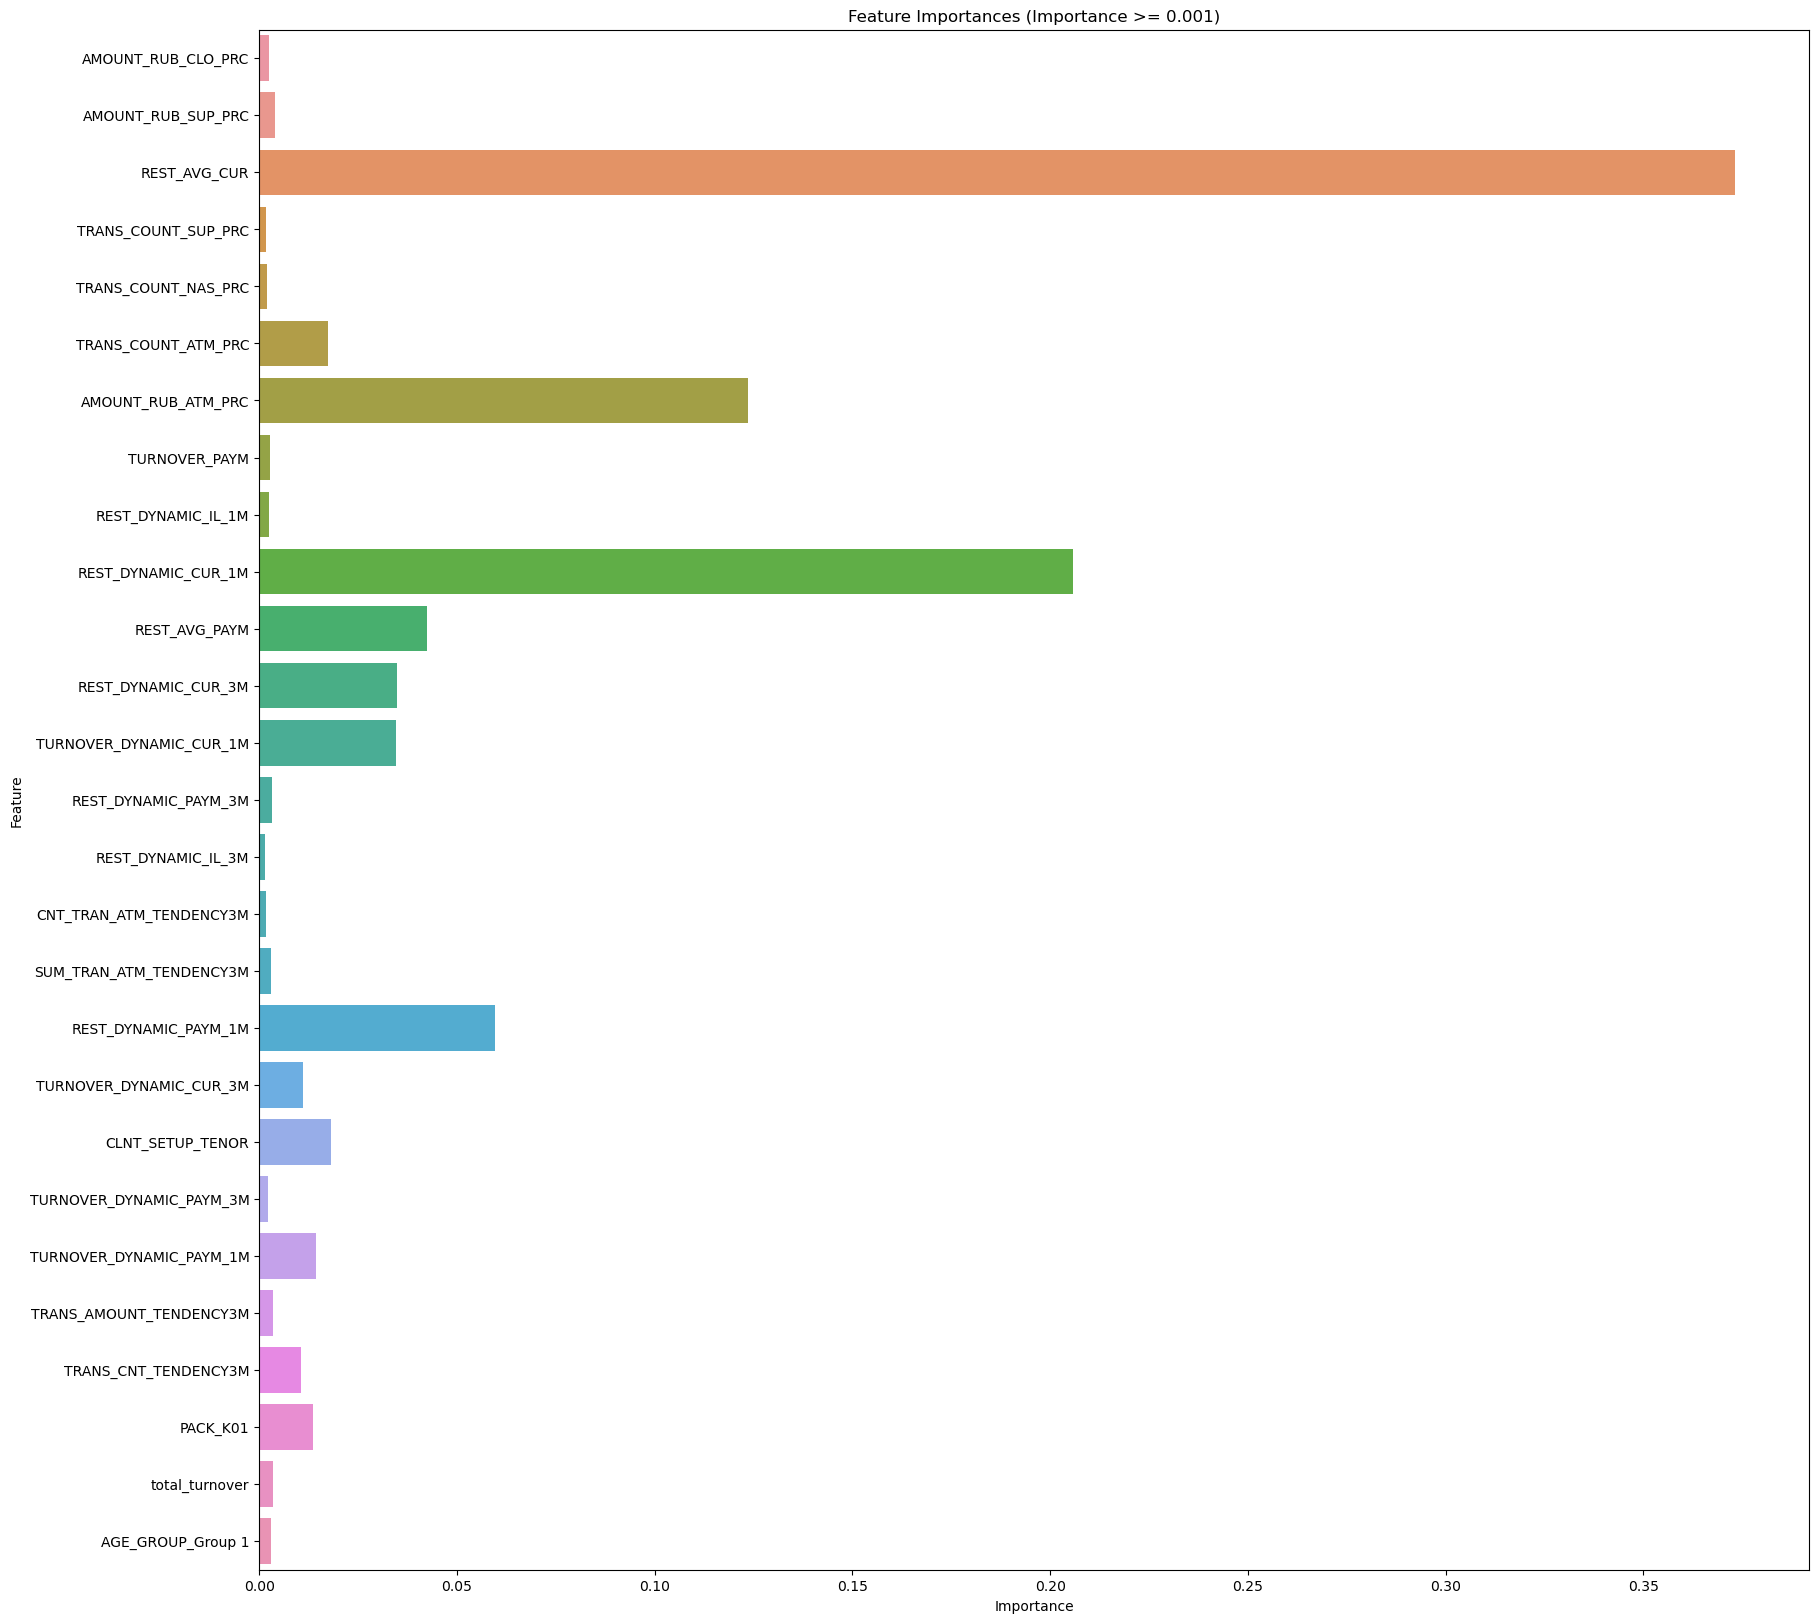

In [94]:
# Set the threshold for feature importance
threshold = 0.001

# Filter out features below the threshold
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Importance'] >= threshold]

# Print the top N most important features after filtering
print(f"Top {len(filtered_feature_importance_df)} Important Features (importance >= {threshold}):")
print(filtered_feature_importance_df)

# Plot the feature importances after filtering
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=filtered_feature_importance_df)
plt.title('Feature Importances (Importance >= 0.001)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Global and Local Feature Importance

Top 10 Important Global Features (importance >= 0.001):
                Feature  Importance
1    AMOUNT_RUB_CLO_PRC    0.002508
3    AMOUNT_RUB_SUP_PRC    0.004098
7          REST_AVG_CUR    0.373253
9   TRANS_COUNT_SUP_PRC    0.001796
10  TRANS_COUNT_NAS_PRC    0.002100
14  TRANS_COUNT_ATM_PRC    0.017532
15   AMOUNT_RUB_ATM_PRC    0.123591
16        TURNOVER_PAYM    0.002633
19   REST_DYNAMIC_IL_1M    0.002412
21  REST_DYNAMIC_CUR_1M    0.205796


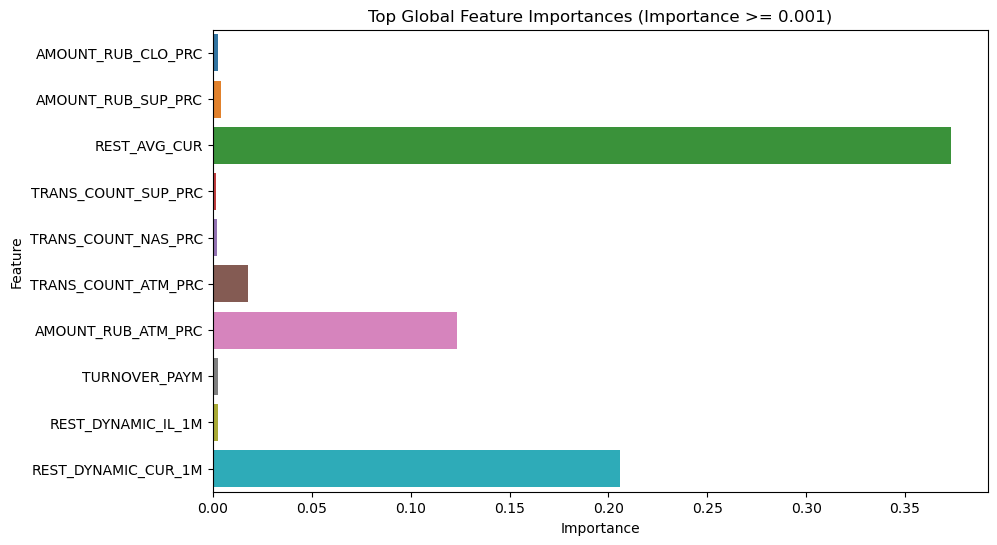


Local Features (importance < 0.001):
                     Feature  Importance
0             CR_PROD_CNT_IL    0.000505
2     TURNOVER_DYNAMIC_IL_1M    0.000000
4       REST_DYNAMIC_FDEP_1M    0.000000
5       REST_DYNAMIC_SAVE_3M    0.000000
6            CR_PROD_CNT_VCU    0.000000
8         AMOUNT_RUB_NAS_PRC    0.000879
11          CR_PROD_CNT_TOVR    0.000229
12           CR_PROD_CNT_PIL    0.000000
13               TURNOVER_CC    0.000000
17            CR_PROD_CNT_CC    0.000000
18      REST_DYNAMIC_FDEP_3M    0.000000
20          CR_PROD_CNT_CCFP    0.000000
23  LDEAL_GRACE_DAYS_PCT_MED    0.000000
29    TURNOVER_DYNAMIC_IL_3M    0.000000
38        REST_DYNAMIC_CC_1M    0.000000
39    TURNOVER_DYNAMIC_CC_1M    0.000000
40        REST_DYNAMIC_CC_3M    0.000000
41    TURNOVER_DYNAMIC_CC_3M    0.000000
42                  PACK_101    0.000000
43                  PACK_102    0.000000
44                  PACK_103    0.000000
45                  PACK_104    0.000000
46                 

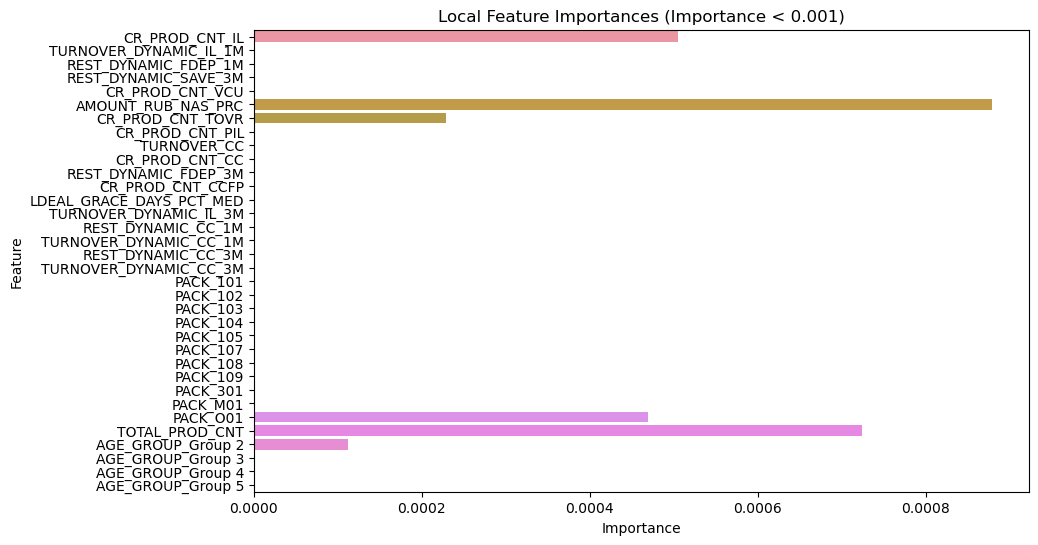

In [102]:
# Set the threshold for feature importance
threshold = 0.001

# Filter out features above and below the threshold
global_feature_importance_df = feature_importance_df[feature_importance_df['Importance'] >= threshold]
local_feature_importance_df = feature_importance_df[feature_importance_df['Importance'] < threshold]

# Print the top N most important global features after filtering
top_n_global = 10  # specify the number of top global features you want to display
print(f"Top {top_n_global} Important Global Features (importance >= {threshold}):")
print(global_feature_importance_df.head(top_n_global))

# Plot the global feature importances after filtering
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=global_feature_importance_df.head(top_n_global))
plt.title('Top Global Feature Importances (Importance >= 0.001)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the local feature importance
print("\nLocal Features (importance < 0.001):")
print(local_feature_importance_df)

# Plot the local feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=local_feature_importance_df)
plt.title('Local Feature Importances (Importance < 0.001)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Instance 1 (Index 100337):
Feature 'REST_AVG_CUR' - Importance: 0.2
Feature 'REST_DYNAMIC_CUR_1M' - Importance: 0.2
Feature 'CR_PROD_CNT_CC' - Importance: 0.19999999999999998
Feature 'CR_PROD_CNT_IL' - Importance: 0.16666666666666666
Feature 'TRANS_COUNT_ATM_PRC' - Importance: 0.16666666666666666
Feature 'AMOUNT_RUB_CLO_PRC' - Importance: 0.16666666666666666
Feature 'REST_DYNAMIC_PAYM_1M' - Importance: 0.03333333333333333
Feature 'REST_DYNAMIC_PAYM_3M' - Importance: 0.03333333333333333
Feature 'CLNT_SETUP_TENOR' - Importance: 0.03333333333333333
Feature 'TURNOVER_PAYM' - Importance: 0.03333333333333333
Feature 'REST_DYNAMIC_FDEP_1M' - Importance: 0.0
Feature 'REST_DYNAMIC_FDEP_3M' - Importance: 0.0
Feature 'TURNOVER_DYNAMIC_CUR_1M' - Importance: 0.0
Feature 'REST_DYNAMIC_CUR_3M' - Importance: 0.0
Feature 'LDEAL_GRACE_DAYS_PCT_MED' - Importance: 0.0
Feature 'REST_AVG_PAYM' - Importance: 0.0
Feature 'CR_PROD_CNT_CCFP' - Importance: 0.0
Feature 'REST_DYNAMIC_IL_1M' - Importance: 0.0
Feat

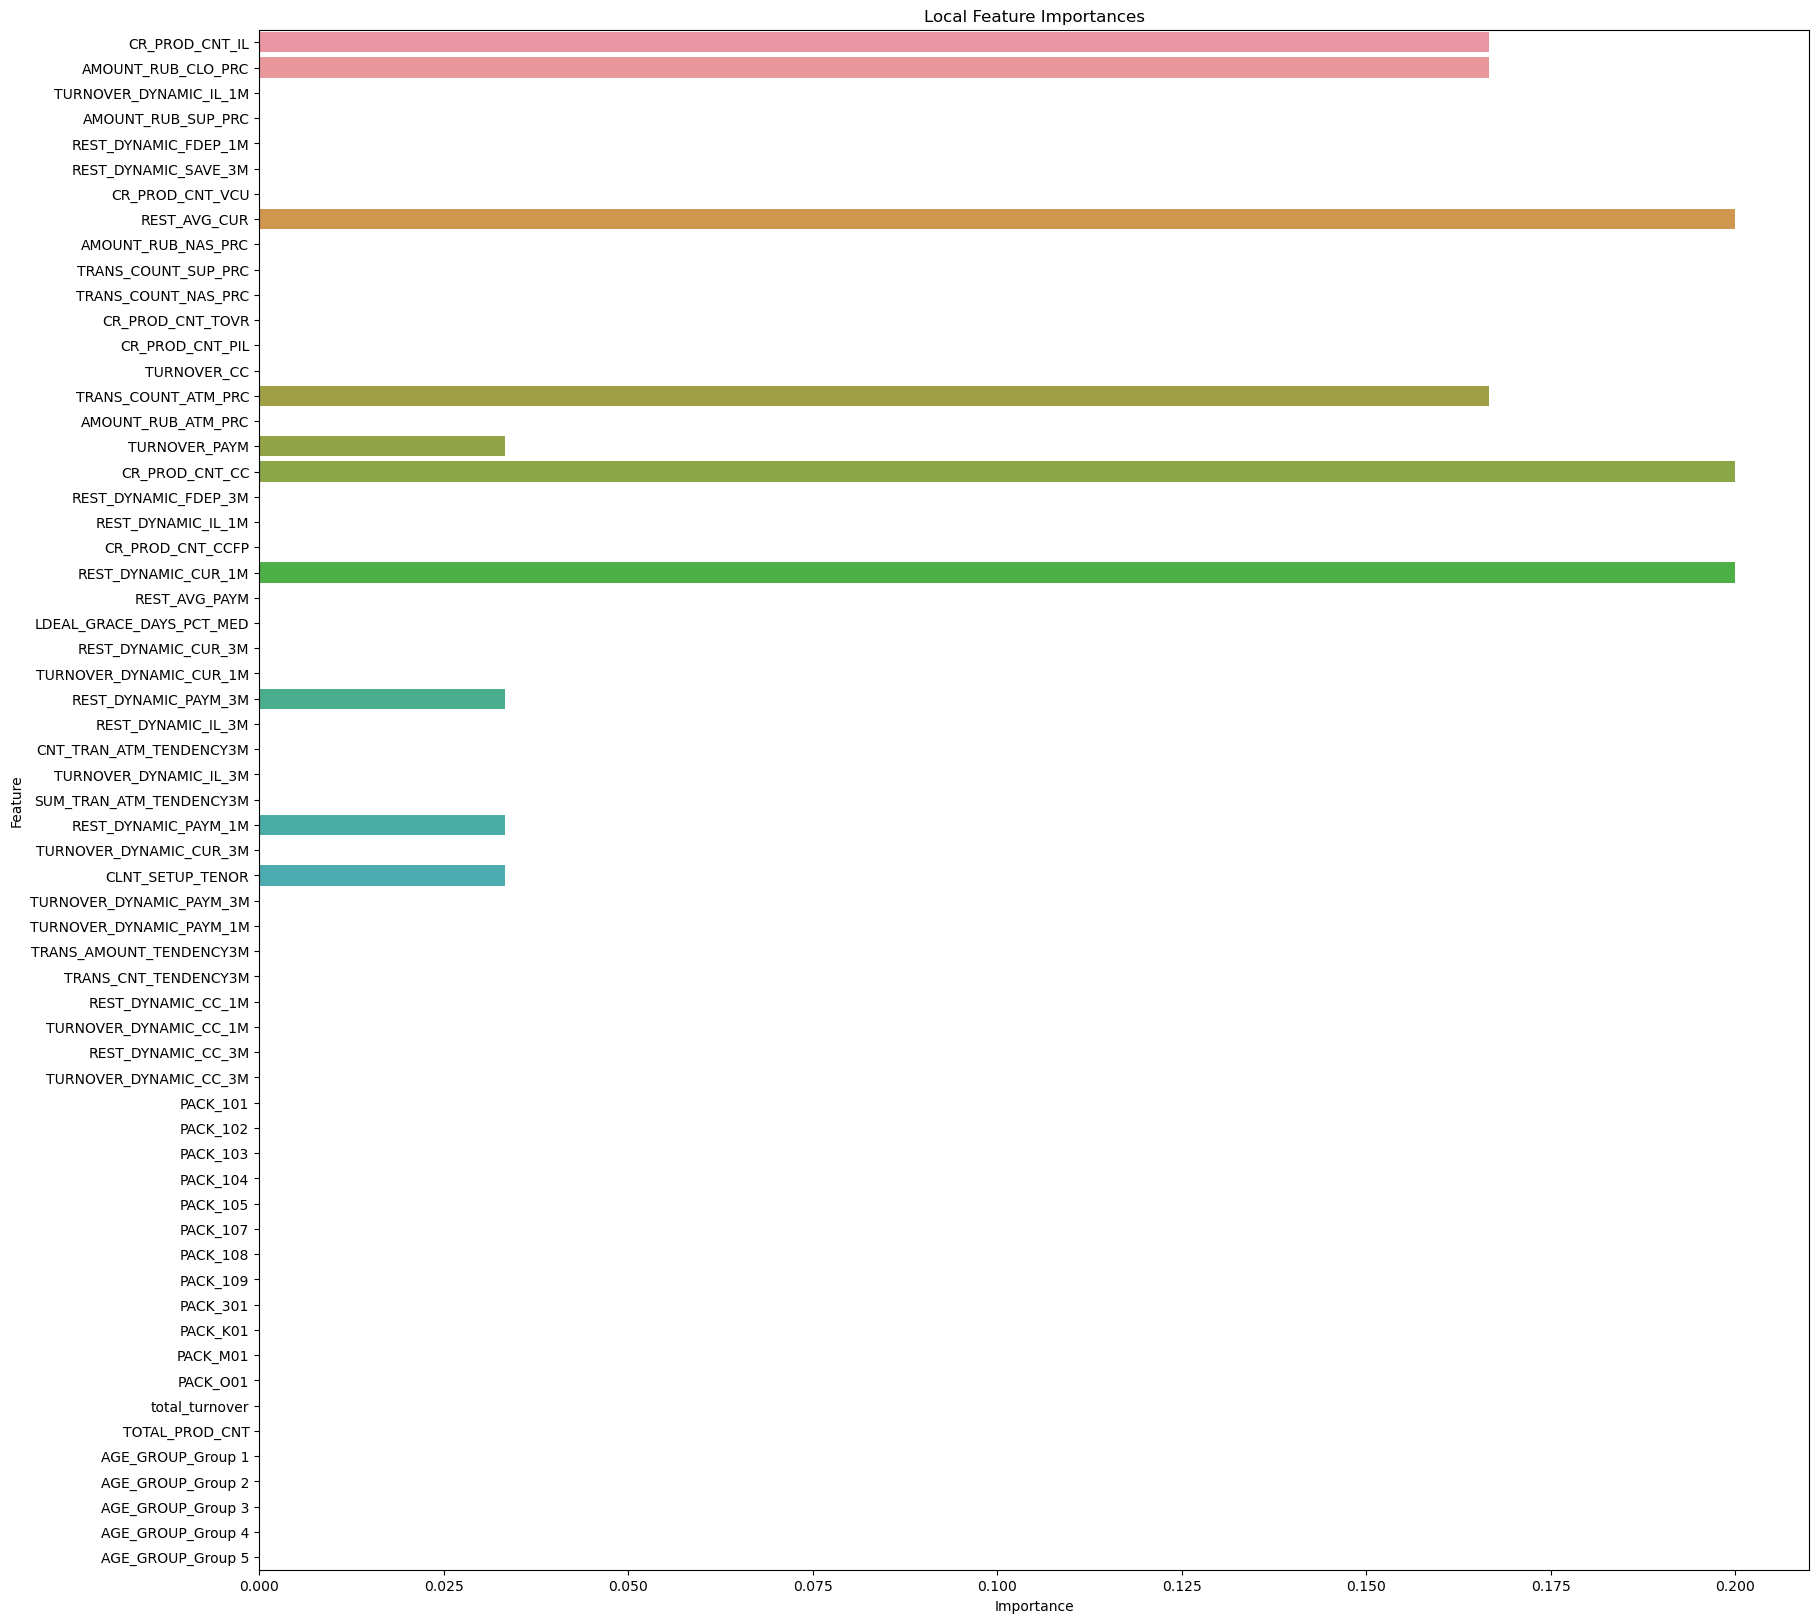

In [101]:
# Get the number of samples in your test set
num_samples = len(X_test_scaled)

# Choose 3 random indices from the test set
random_indices = random.sample(range(num_samples), 3)

# Extract instances using the selected random indices
instances_to_interpret = X_test_scaled[random_indices]

# Calculate permutation importance for local feature importance
perm_importance = permutation_importance(best_rf_classifier, instances_to_interpret, y_test.values[random_indices], n_repeats=10, random_state=42)
local_feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance['importances_mean']})

# Interpret local feature importance for each instance
for idx, instance_idx in enumerate(random_indices):
    print(f"\nInstance {idx + 1} (Index {instance_idx}):")
    instance_local_importance = local_feature_importance.loc[:, 'Importance'].values
    sorted_indices = instance_local_importance.argsort()[::-1]
    for i in sorted_indices:
        print(f"Feature '{local_feature_importance.loc[i, 'Feature']}' - Importance: {instance_local_importance[i]}")

# Plot the local feature importances
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=local_feature_importance)
plt.title('Local Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Global Feature Importances (Importance >= 0.01):
                     Feature  Importance
7               REST_AVG_CUR    0.157174
21       REST_DYNAMIC_CUR_1M    0.081756
33          CLNT_SETUP_TENOR    0.062747
25   TURNOVER_DYNAMIC_CUR_1M    0.056477
24       REST_DYNAMIC_CUR_3M    0.051221
15        AMOUNT_RUB_ATM_PRC    0.042851
32   TURNOVER_DYNAMIC_CUR_3M    0.041399
14       TRANS_COUNT_ATM_PRC    0.038249
37      TRANS_CNT_TENDENCY3M    0.036188
36   TRANS_AMOUNT_TENDENCY3M    0.035563
3         AMOUNT_RUB_SUP_PRC    0.030185
9        TRANS_COUNT_SUP_PRC    0.029107
30   SUM_TRAN_ATM_TENDENCY3M    0.028910
54            total_turnover    0.027904
28   CNT_TRAN_ATM_TENDENCY3M    0.026475
1         AMOUNT_RUB_CLO_PRC    0.024774
10       TRANS_COUNT_NAS_PRC    0.019875
8         AMOUNT_RUB_NAS_PRC    0.019664
22             REST_AVG_PAYM    0.018859
31      REST_DYNAMIC_PAYM_1M    0.015437
35  TURNOVER_DYNAMIC_PAYM_1M    0.012801
16             TURNOVER_PAYM    0.011282
55      

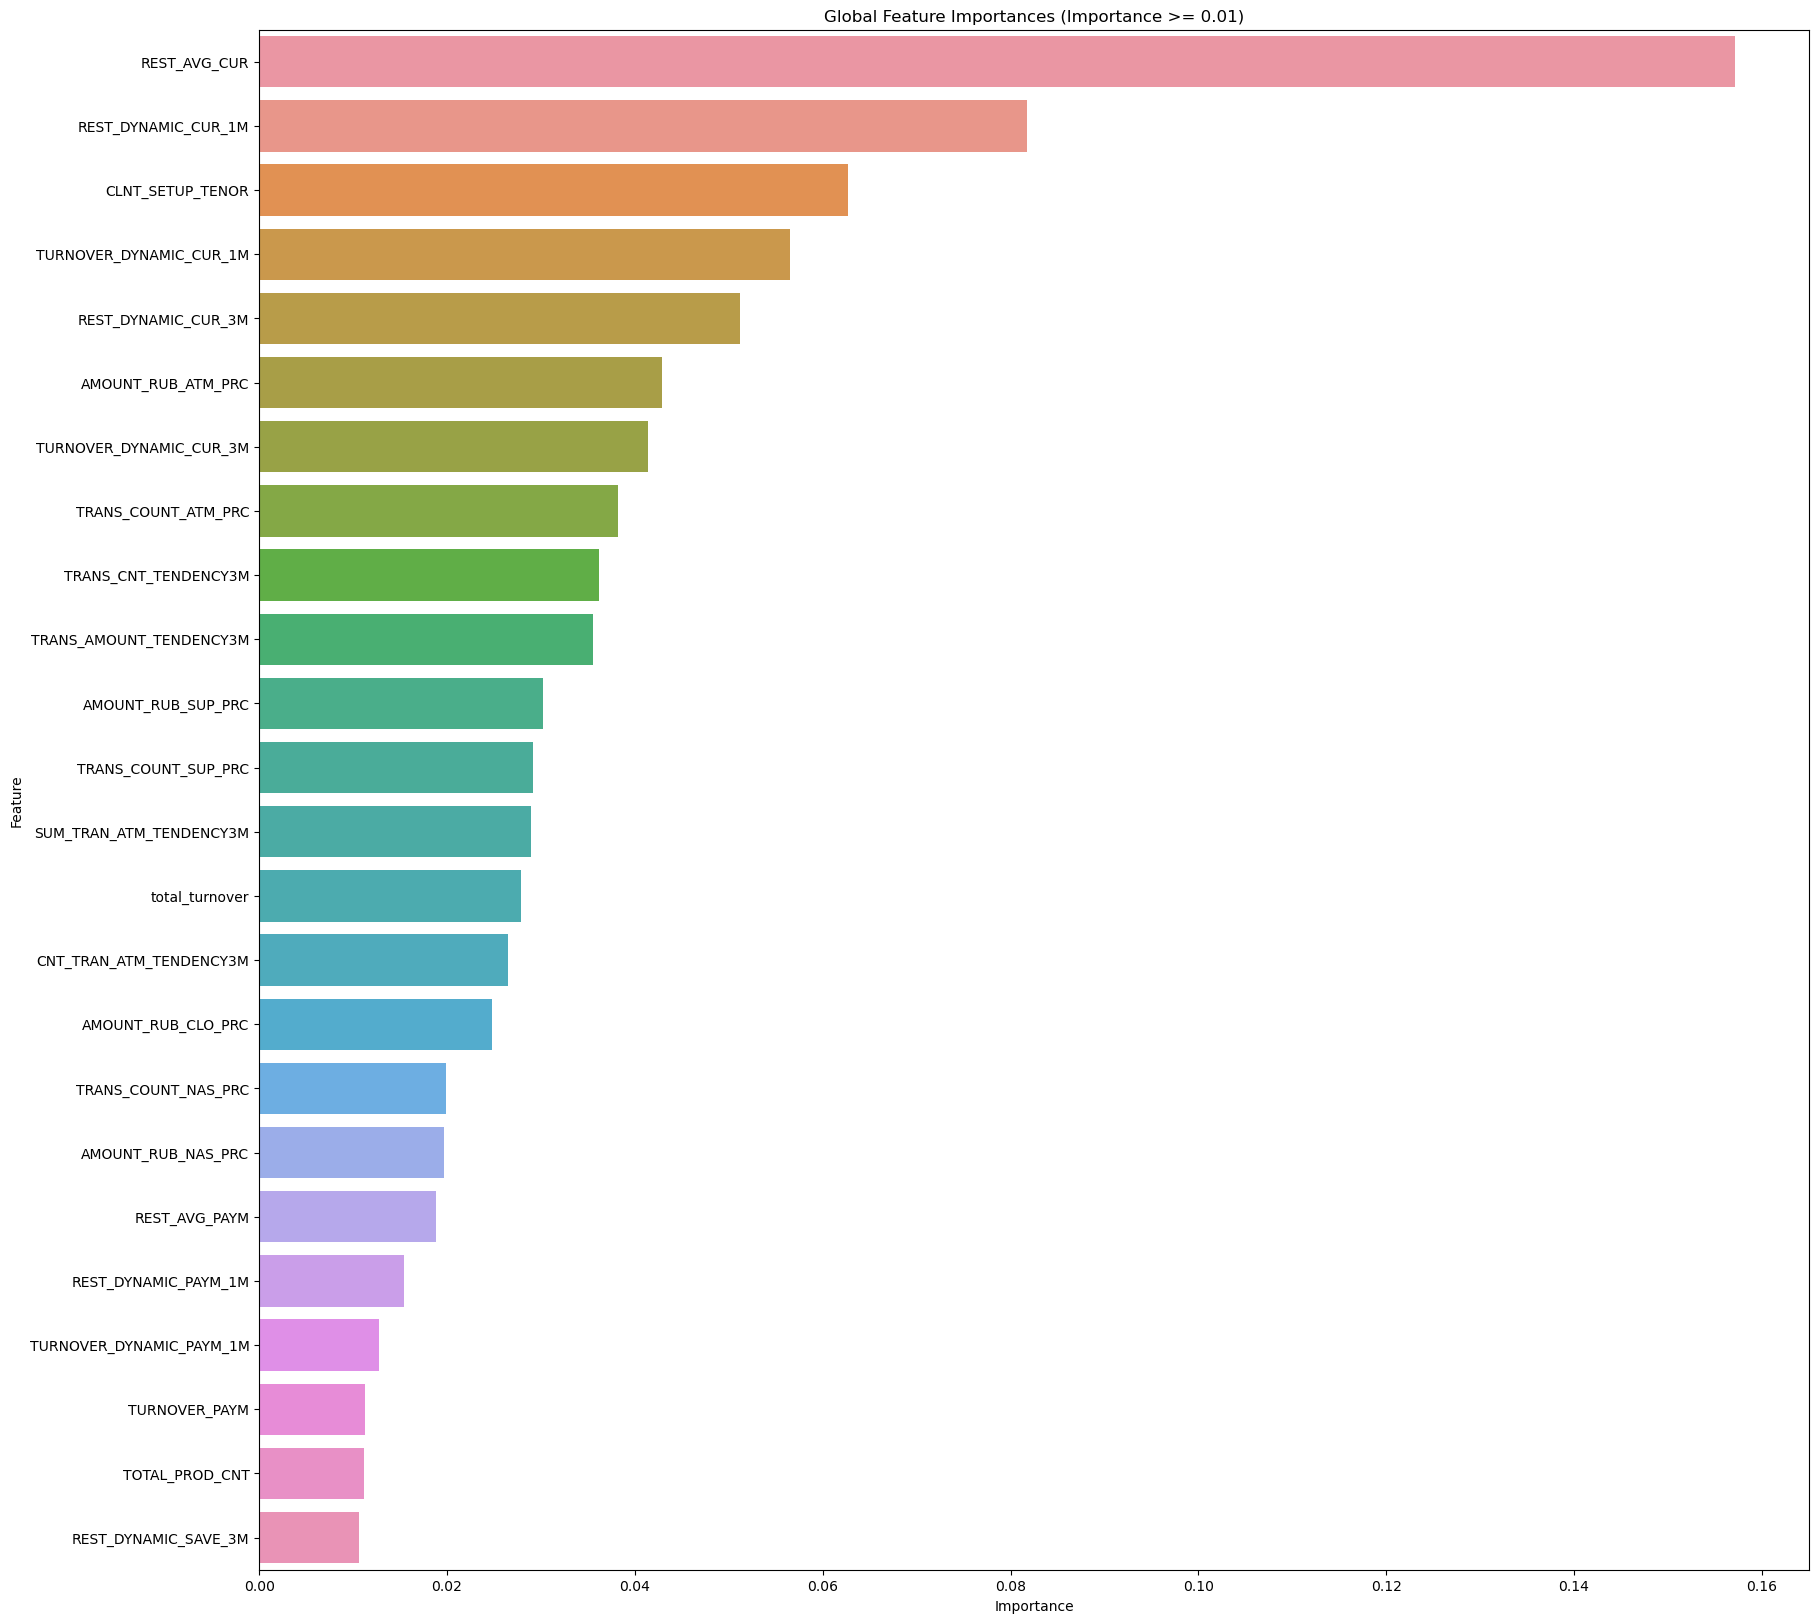

In [97]:
# Train the Random Forest classifier on the entire training dataset
rf_classifier_global = RandomForestClassifier()
rf_classifier_global.fit(X_train_scaled, y_train_undersampled)

# Get feature importances from the trained classifier
feature_importances_global = rf_classifier_global.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding feature names
global_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_global})

# Apply threshold to filter out features with importance below 0.01
global_feature_importance_df = global_feature_importance_df[global_feature_importance_df['Importance'] >= 0.01]

# Sort the DataFrame by feature importance in descending order
global_feature_importance_df = global_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the global feature importances after applying threshold
print("Global Feature Importances (Importance >= 0.01):")
print(global_feature_importance_df)

# Plot the global feature importances after applying threshold
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=global_feature_importance_df)
plt.title('Global Feature Importances (Importance >= 0.01)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## These are the result we got from shap 

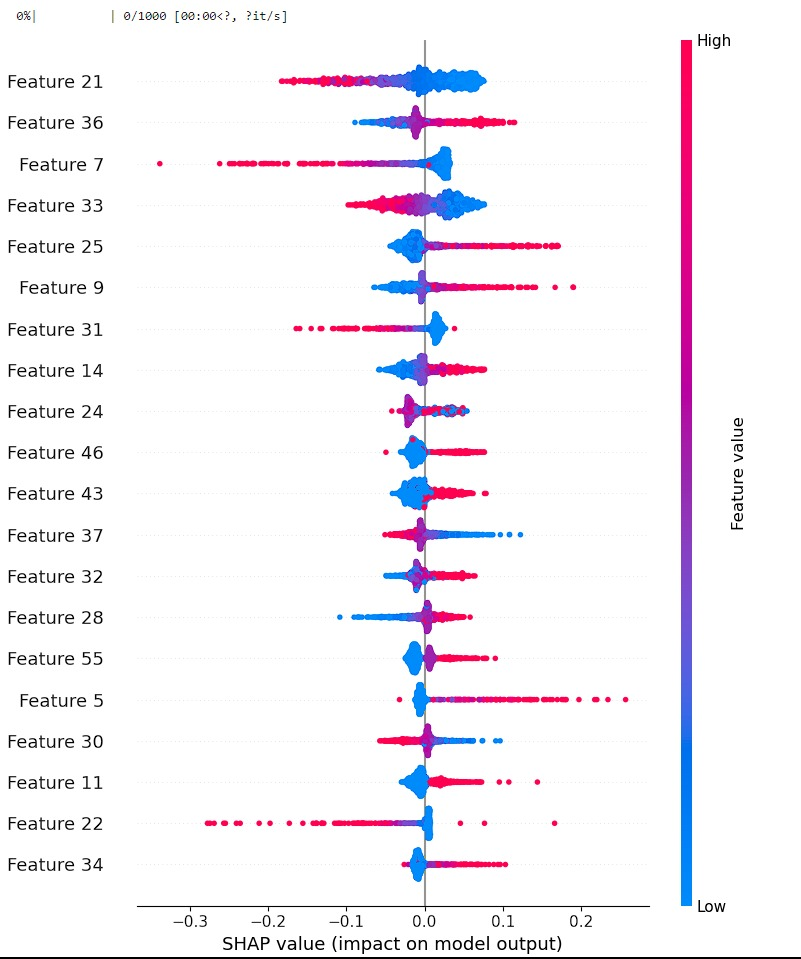

## global features of random forest that we also got from shap as well 
  - REST_DYNAMIC_CUR_1M
  - REST_AVG_CUR
  - TRANS_AMOUNT_TENDENCY3M
  - TRANS_AMOUNT_TENDENCY3M
  - TURNOVER_DYNAMIC_CUR_1M
  - TURNOVER_DYNAMIC_CUR_1M
  - TURNOVER_DYNAMIC_CUR_1M,etc...

## global features of decision tree
  - REST_AVG_CUR
  - REST_DYNAMIC_CUR_1M
  - TURNOVER_DYNAMIC_CUR_1M
  - REST_DYNAMIC_PAYM_1M
  - REST_AVG_PAYM
  - REST_DYNAMIC_CUR_3M, etc..
  

so, we can say that these features were globally important for both decision tree and random forest because these features were also selected from shap as they more impact on model. 